In [10]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz

--2024-04-07 01:39:25--  http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘SUSY.csv.gz’

SUSY.csv.gz             [             <=>    ] 879.65M  8.67MB/s    in 68s     

2024-04-07 01:40:33 (13.0 MB/s) - ‘SUSY.csv.gz’ saved [922377711]



In [11]:
!gunzip SUSY.csv.gz

In [12]:
ls -lh

total 2.3G
drwxr-xr-x 1 root root 4.0K Apr  4 13:24 sample_data/
-rw-r--r-- 1 root root 2.3G Apr  7 01:40 SUSY.csv
-rw-r--r-- 1 root root    0 Apr  7 01:39 Susy-small.csv


In [13]:
filename="SUSY.csv"


In [14]:
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

In [15]:
!head -500000 /content/SUSY.csv > Susy-small.csv


In [16]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [17]:
FeatureNames

['MET_rel',
 'M_Delta_R',
 'R',
 'S_R',
 'M_TR_2',
 'axial_MET',
 'M_R',
 'MT2',
 'dPhi_r_b',
 'cos_theta_r1']

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
filename = "Susy-small.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

In [ ]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0.0,0.719035,1.091879,0.291540,1.205962,-1.599117,-1.139445,0.424546,1.154849,0.637185,-0.091178,1.972156,0.697028,0.313636,0.988602,1.981573,0.744828,1.095080,0.006546
499996,1.0,0.910016,-0.364544,-0.777120,0.543648,-0.910632,-1.723707,2.864673,1.458272,2.176558,-0.590911,0.673695,1.662140,2.189362,1.195041,0.910815,1.181893,1.252362,0.826035
499997,1.0,0.842954,0.332476,-1.048564,1.347989,0.320496,-0.666358,0.450433,-0.411872,0.293407,0.630491,0.859920,0.403371,0.416258,0.591989,0.372003,0.716788,0.366991,0.265798
499998,0.0,1.370760,-1.162912,0.893499,2.118091,1.248496,-0.887211,0.164659,0.316840,0.215165,0.280418,3.087083,0.526929,0.151467,0.308067,3.098183,0.233042,0.876216,0.000593


In [20]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

l_1_pT


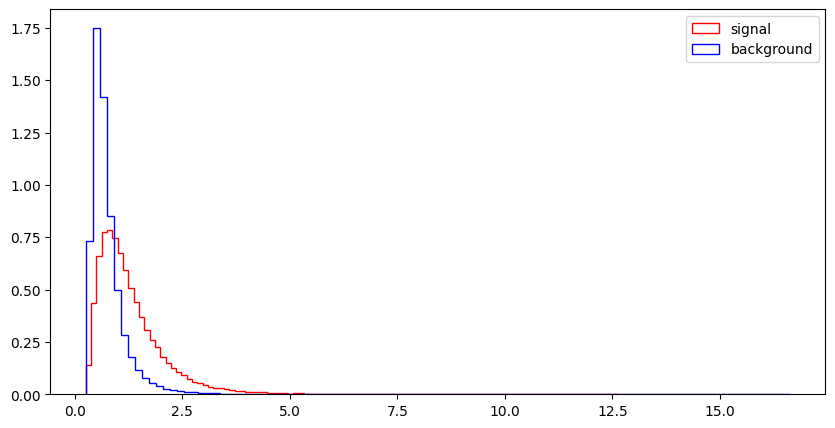

l_1_eta


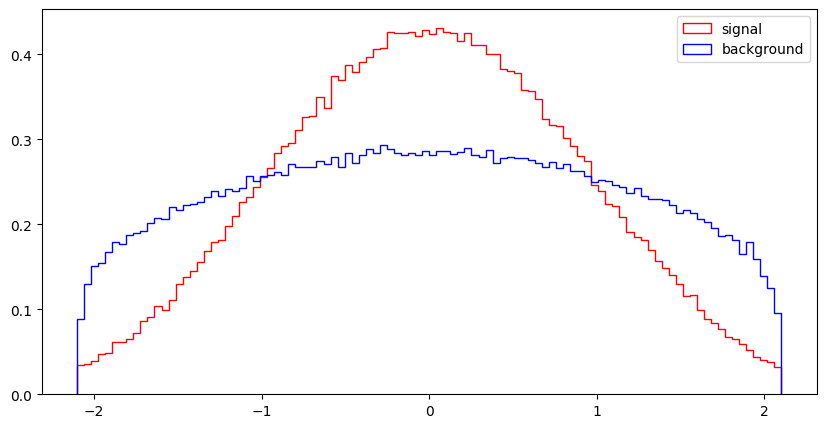

l_1_phi


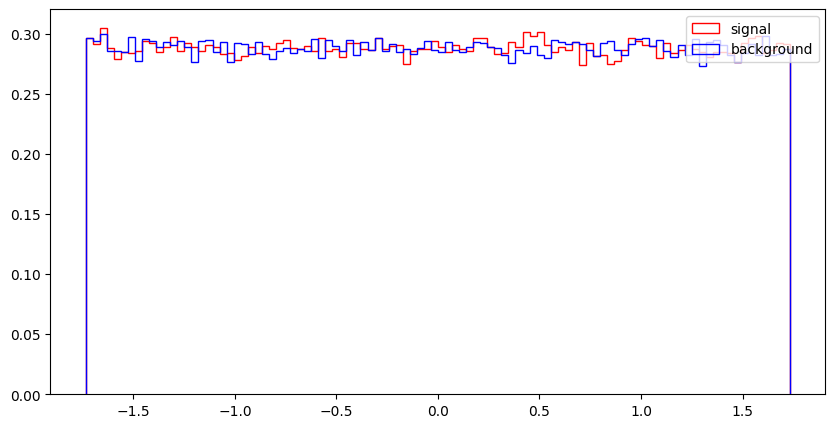

l_2_pT


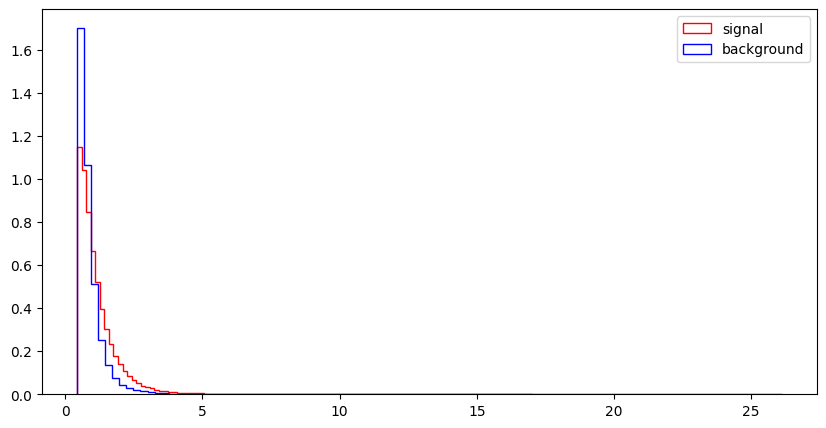

l_2_eta


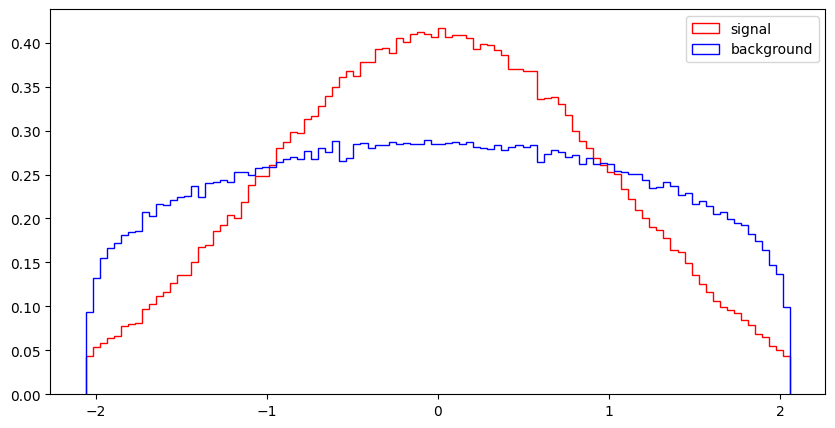

l_2_phi


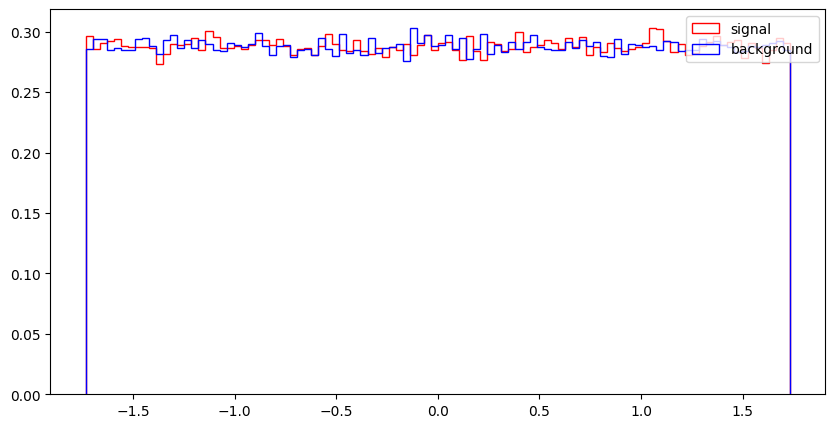

MET


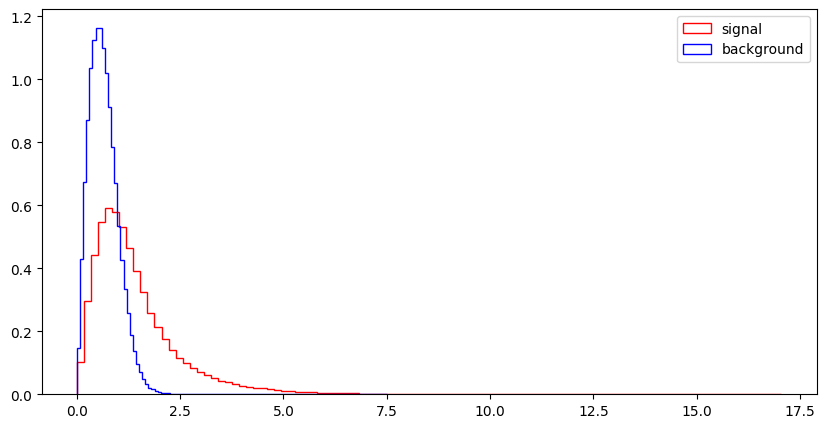

MET_phi


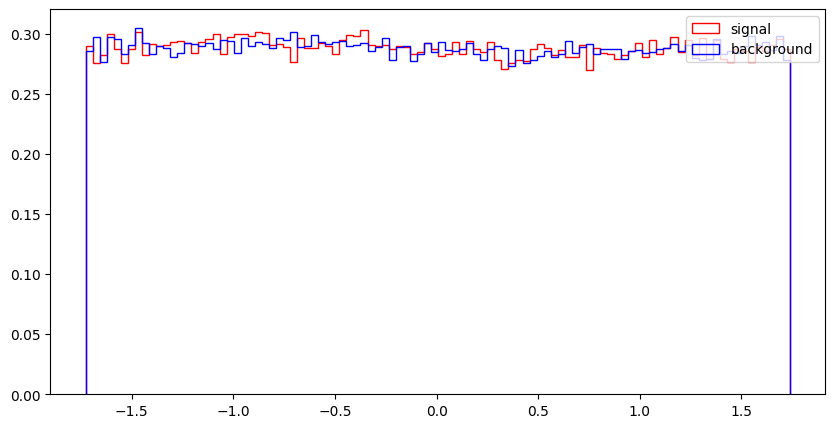

MET_rel


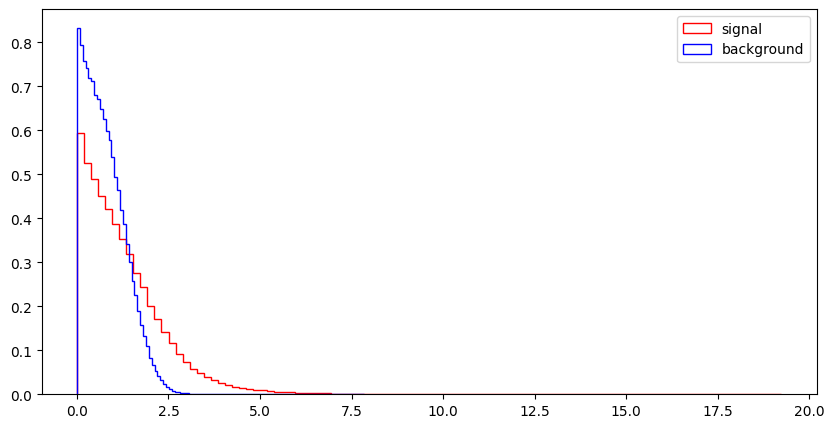

axial_MET


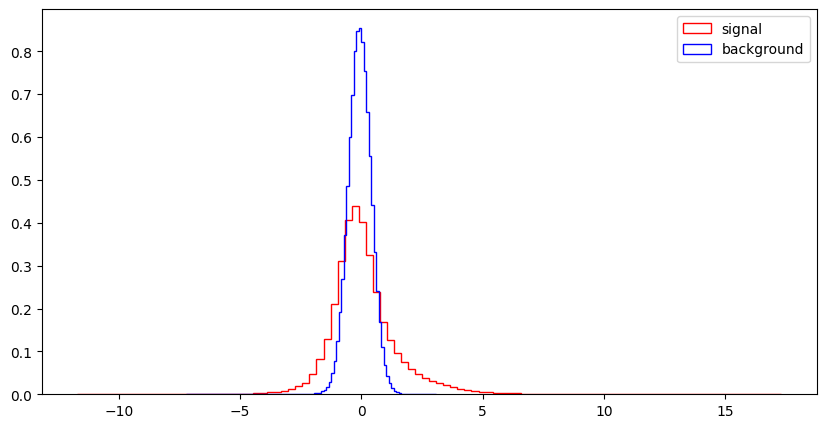

M_R


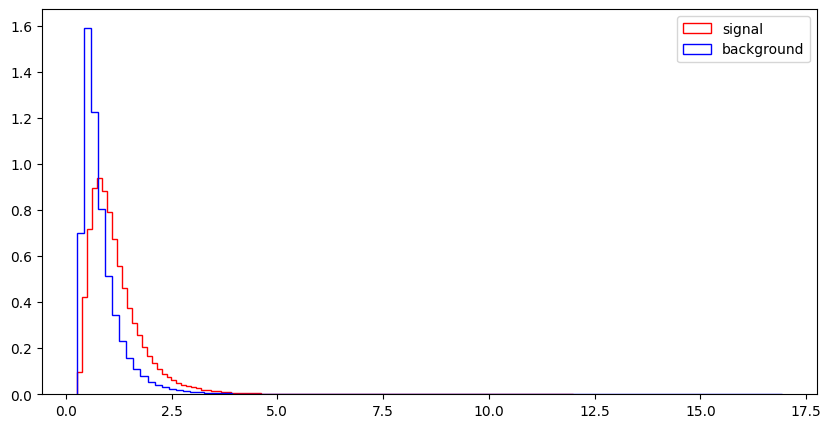

M_TR_2


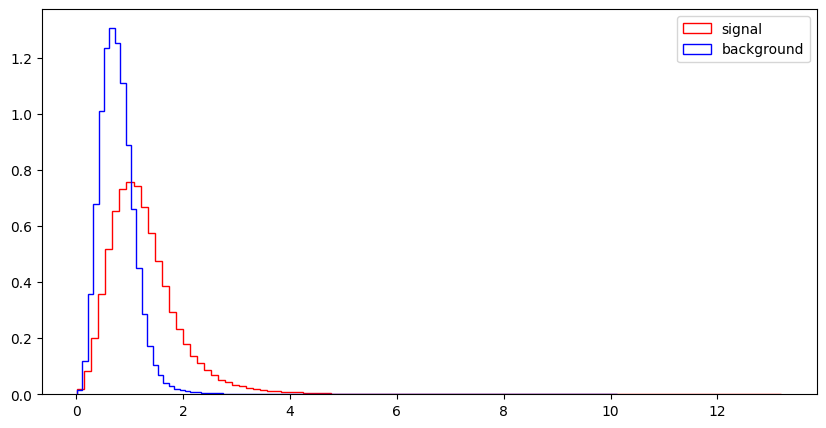

R


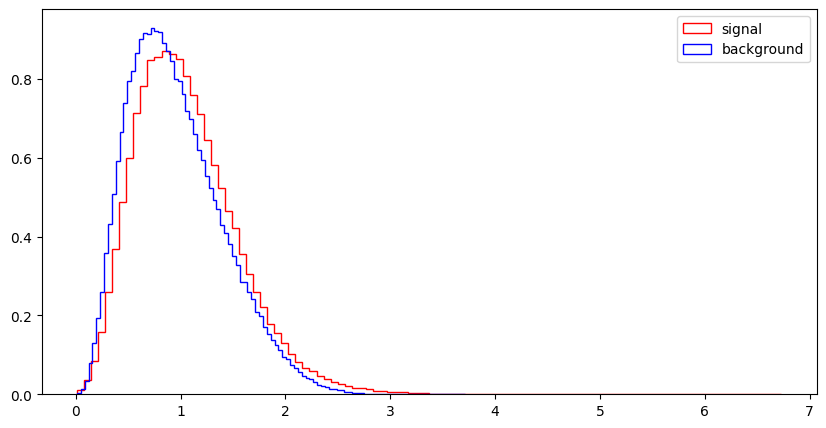

MT2


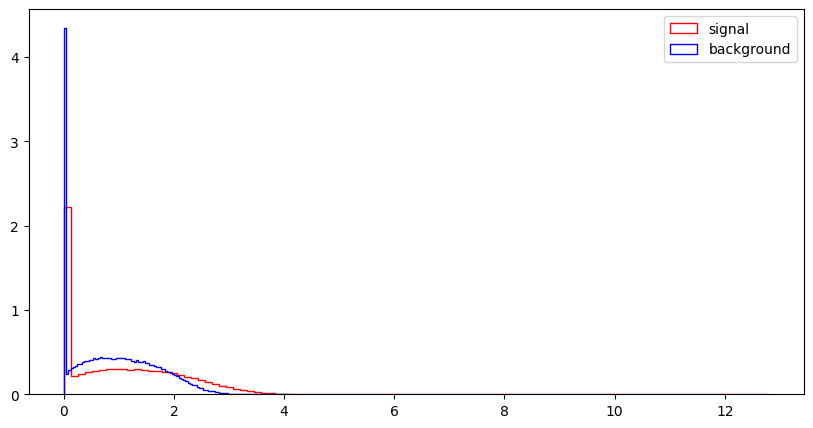

S_R


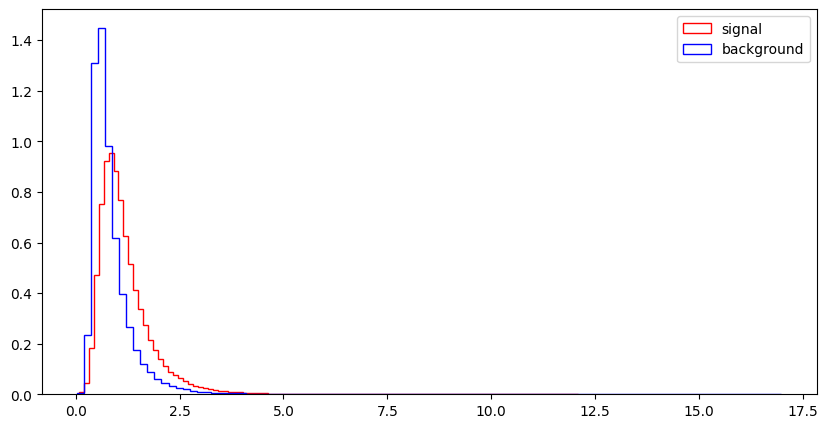

M_Delta_R


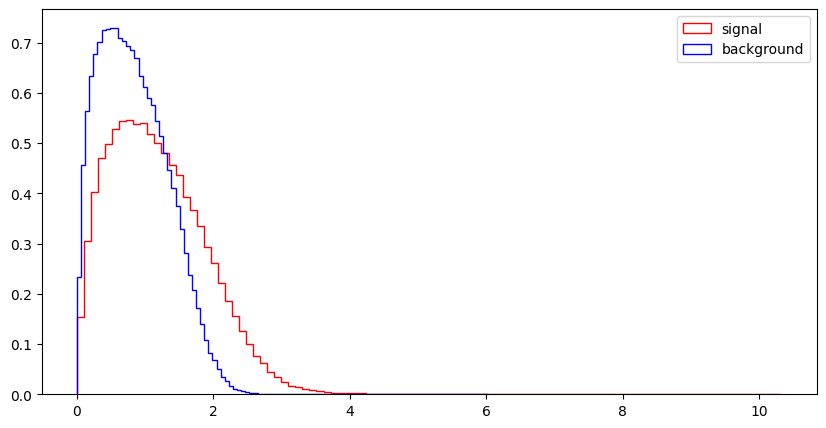

dPhi_r_b


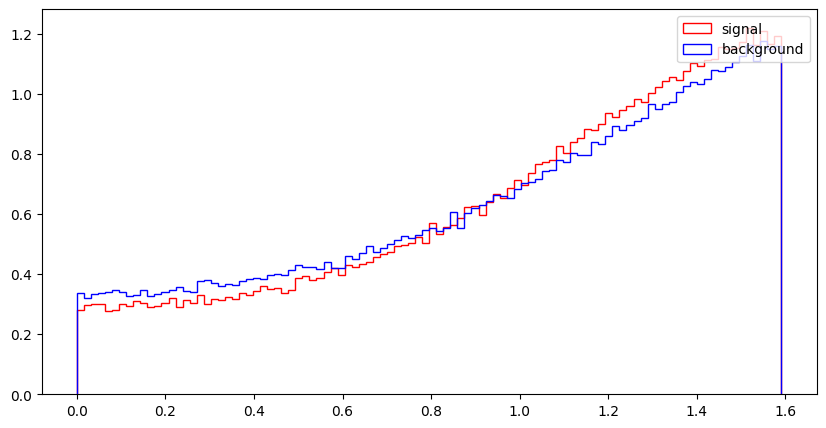

cos_theta_r1


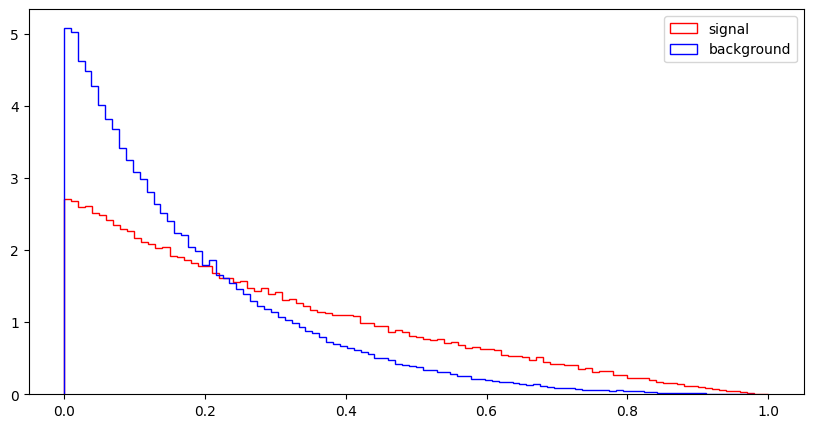

In [22]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

Text(0, 0.5, 'l_1_pT')

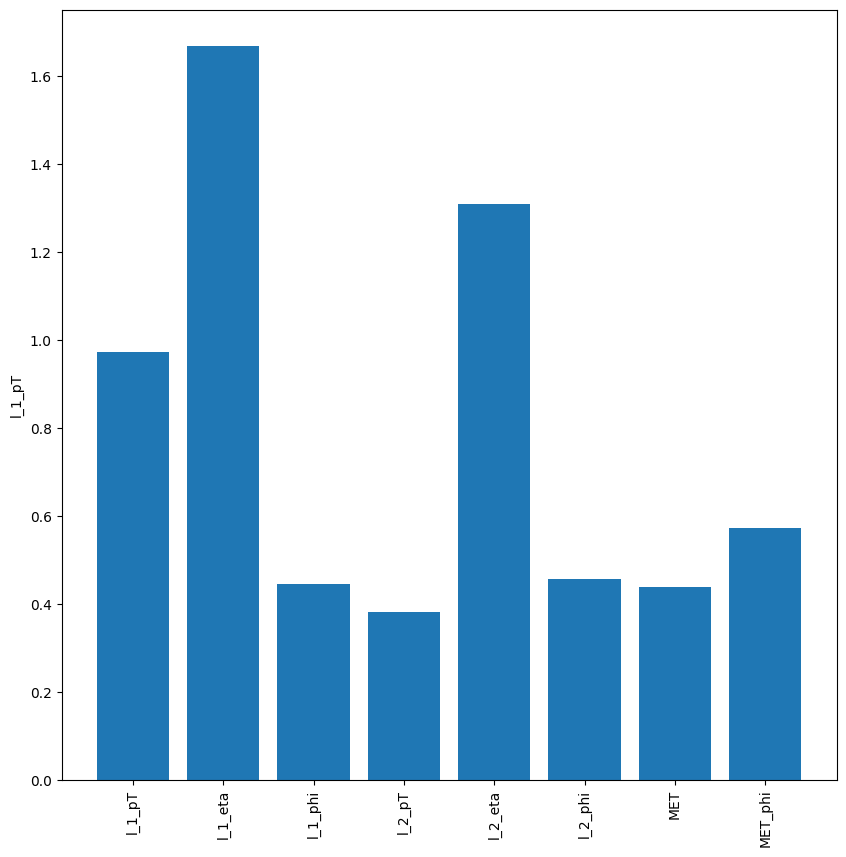

In [23]:
low_level_labels = ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 'MET', 'MET_phi']
high_level_labels = ['MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1'] #separated column names into low and high levels

fig, ax = plt.subplots(1, 1, figsize=(10, 10)) #subplot with figure size set to 10,10

ax.bar(range(8), df[df.columns[1]][0:8])
ax.set_xticks(range(8))
ax.set_xticklabels(low_level_labels, rotation='vertical', fontsize=10)
ax.set_ylabel(df.columns[1])


Text(0, 0.5, 'l_1_pT')

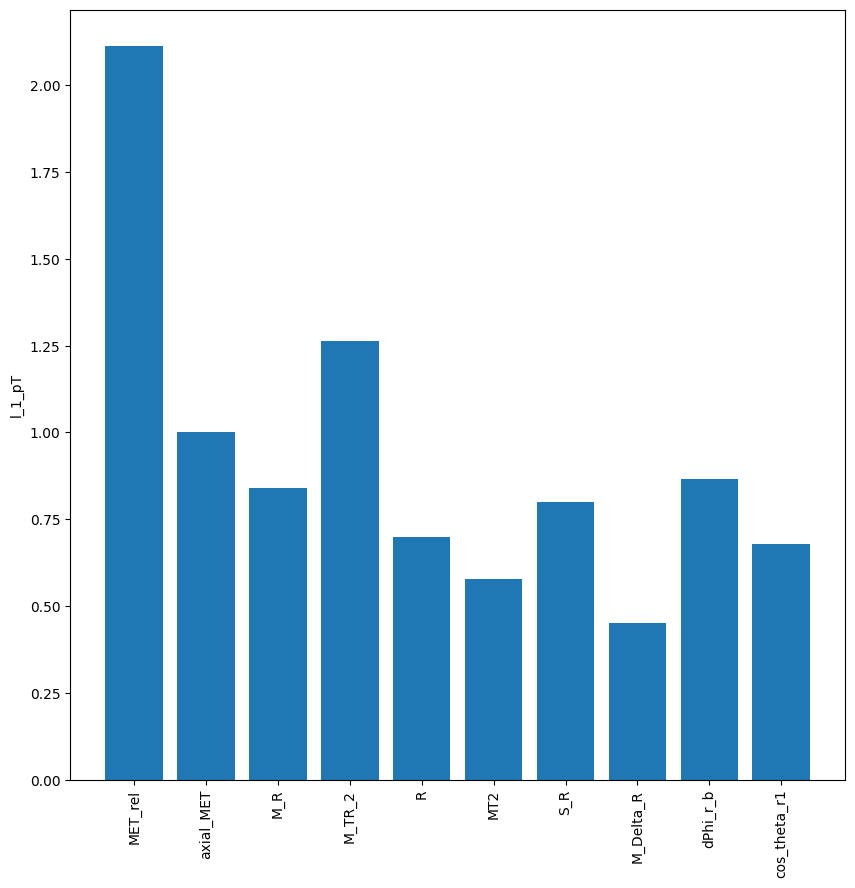

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.bar(range(10), df[df.columns[1]][8:18])
ax.set_xticks(range(10))
ax.set_xticklabels(high_level_labels, rotation='vertical', fontsize=10)
ax.set_ylabel(df.columns[1])


In [25]:
##################################doesn't work
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def makepairplots(df, labels):
    num_features = len(labels)#number of features

    fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))#creates figure and array of subplots

    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i in range(num_features):
        for j in range(num_features):#loop per column
            if i == j:#on diagonal
                axes[i, j].hist(df[df.columns[i]], bins=30, color='skyblue', edgecolor='black')#plots histogram of column val
                axes[i, j].set_xlabel(labels[i])
                axes[i, j].set_ylabel('Frequency')
            else:#nondiagonal scatterplot
                axes[i, j].scatter(df[df.columns[j]], df[df.columns[i]], s=1, alpha=0.5, color='orange') #plots scatterplot to value of 2 columns
                axes[i, j].set_xlabel(labels[j]) #sets x axis label to feature name
                axes[i, j].set_ylabel(labels[i])

    plt.tight_layout() #this changes subplot paramters
    plt.show()

labels = ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 'MET', 'MET_phi',
          'MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1'] #labels for the features




In [ ]:
makepairplots(df, labels)
#tried to run this and "session crashed after using all available RAM"

In [ ]:
#don't know how to make this run faster since it doesn't run at all

In [ ]:
#as far as observables go i can't figure it out since it wont run

In [ ]:
######################################################################3
def snspairplotlow(susy_data):

    low_level_features = susy_data.iloc[:, :8]
    print("Pair plots for Low-level Features")
    sns.pairplot(low_level_features)
    plt.show()

Pair plots for Low-level Features


KeyboardInterrupt: 

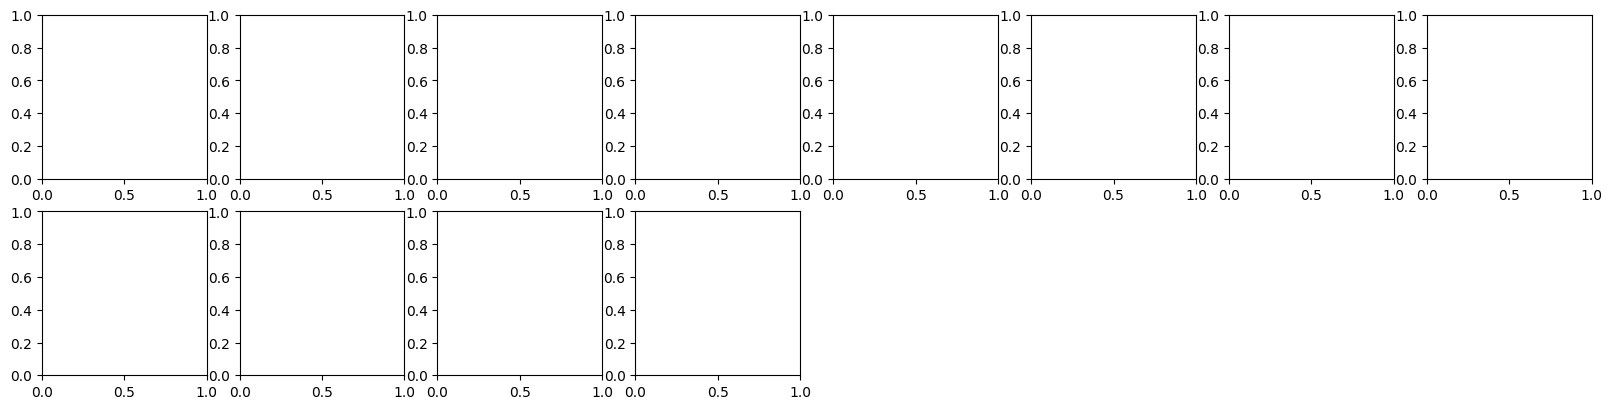

In [26]:
############################################################
import seaborn as sns

def snspairplot(susy_data):

    low_level_features = susy_data.iloc[:, :8]
    high_level_features = susy_data.iloc[:, 8:]

    print("Pair plots for Low-level Features")
    sns.pairplot(low_level_features)
    plt.show()

    print("Pair plots for High-level Features")
    sns.pairplot(high_level_features)
    plt.show()

snspairplot(df)


In [27]:
from IPython.display import HTML, display
import tabulate

In [28]:
#4.2.2
import numpy as np

all = np.random.rand(100, 10)  # 100 samples, 10 observables
low_high_features = np.random.rand(100, 5)  # 100 samples, 5 low-level features and 5 high-level features

covariance_all = np.cov(all, rowvar=False)#covariance and correlation matrices
correlation_all = np.corrcoef(all, rowvar=False)

low_features = low_high_features[:, :5]  # takes low-level features
high_features = low_high_features[:, 5:]

covariance_low = np.cov(low_features, rowvar=False) #computes covariance and correlation coefficient matrixs with the feature(low_features in this case)
correlation_low = np.corrcoef(low_features, rowvar=False)#rowvar is the argument that distinguishes between row and column so in this each volumn represents a variable, and if it was true it would be viceversa

covariance_high = np.cov(high_features, rowvar=False)
correlation_high = np.corrcoef(high_features, rowvar=False)


print("Covariance matrix for all observables:")#prints matrices
print(covariance_all)
print("\nCorrelation matrix for all observables:")
print(correlation_all)

print("\nCovariance matrix for low-level features:")
print(covariance_low)
print("\nCorrelation matrix for low-level features:")
print(correlation_low)

print("\nCovariance matrix for high-level features:")
print(covariance_high)
print("\nCorrelation matrix for high-level features:")
print(correlation_high)


Covariance matrix for all observables:
[[ 0.08781546  0.00796271 -0.00865653  0.01120633 -0.00191154  0.00521457
  -0.00877749 -0.00533604  0.00377927 -0.00162988]
 [ 0.00796271  0.08878748 -0.00835918 -0.00867361 -0.00673496 -0.00409186
   0.00276916 -0.01153416 -0.0134572   0.00745704]
 [-0.00865653 -0.00835918  0.07750067  0.00280686  0.00163775  0.00997091
  -0.00472682  0.00045518 -0.00124423  0.00572849]
 [ 0.01120633 -0.00867361  0.00280686  0.07867537  0.00175759  0.00989477
  -0.00204617  0.00452316  0.00609626 -0.01632491]
 [-0.00191154 -0.00673496  0.00163775  0.00175759  0.08729278  0.02024867
   0.01714792 -0.00887571  0.003566   -0.01435752]
 [ 0.00521457 -0.00409186  0.00997091  0.00989477  0.02024867  0.08737684
   0.01490819 -0.00871258 -0.00433207  0.0079698 ]
 [-0.00877749  0.00276916 -0.00472682 -0.00204617  0.01714792  0.01490819
   0.08990419 -0.00162651 -0.00904362  0.0191499 ]
 [-0.00533604 -0.01153416  0.00045518  0.00452316 -0.00887571 -0.00871258
  -0.0016265

In [29]:
import numpy as np
from tabulate import tabulate
#import libraries



covariance_all = np.cov(all, rowvar=False)
correlation_all = np.corrcoef(all, rowvar=False)
covariance_low = np.cov(low_features, rowvar=False)
correlation_low = np.corrcoef(low_features, rowvar=False)
covariance_high = np.cov(high_features, rowvar=False)
correlation_high = np.corrcoef(high_features, rowvar=False)

#copied from above, those were the coorelation and covariance matrices


headers = ["Feature"] + [f"Feature {i+1}" for i in range(len(all))]#creates header per feature for the amount of features in the data
table_cov_all = tabulate(covariance_all, headers=headers, floatfmt=".3f", tablefmt="fancy_grid")#table for covariance
table_corr_all = tabulate(correlation_all, headers=headers, floatfmt=".3f", tablefmt="fancy_grid")#correlation table formats the values in the table with three decimal places and specific format fancy grid
table_cov_low = tabulate(covariance_low, headers=headers, floatfmt=".3f", tablefmt="fancy_grid")
table_corr_low = tabulate(correlation_low, headers=headers, floatfmt=".3f", tablefmt="fancy_grid")#low level feature table
table_cov_high = tabulate(covariance_high, headers=headers, floatfmt=".3f", tablefmt="fancy_grid")#high level feature table
table_corr_high = tabulate(correlation_high, headers=headers, floatfmt=".3f", tablefmt="fancy_grid")#high level correlation

print("Covariance Matrix of All Observables:")#all of these embed them into the notebook with nic headings
print(table_cov_all)
print("\nCorrelation Matrix of All Observables:")
print(table_corr_all)

print("\nCovariance Matrix of Low-level Features:")
print(table_cov_low)
print("\nCorrelation Matrix of Low-level Features:")
print(table_corr_low)

print("\nCovariance Matrix of High-level Features:")
print(table_cov_high)
print("\nCorrelation Matrix of High-level Features:")
print(table_corr_high)


Covariance Matrix of All Observables:
╒═══════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╕
│   Feature │   Feature 1 │   Feature 2 │   Feature 3 │   Feature 4 │   Feature 5 │   Feature 6 │   Feature 7 │   Feature 8 │   Feature 9 │
╞═══════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│     0.088 │       0.008 │      -0.009 │       0.011 │      -0.002 │       0.005 │      -0.009 │      -0.005 │       0.004 │      -0.002 │
├───────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│     0.008 │       0.089 │      -0.008 │      -0.009 │      -0.007 │      -0.004 │       0.003 │      -0.012 │      -0.013 │       0.007 │
├───────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼───────────

In [ ]:
#5.1

# x>xc -- L_1_pT, L_2_pT, MET, M_TR_2, S_R M_R, MT2, cos_theta_r1, MET_rel
# x<xc -- dPhi_r_b,
#|x-mu|>xc -- L_1_eta, L_1_phi, L_2_eta, L_2__phi, MET_phi, R, M_TR_2, axial_MET, M_Delta_R
# |x-mu|<xc --

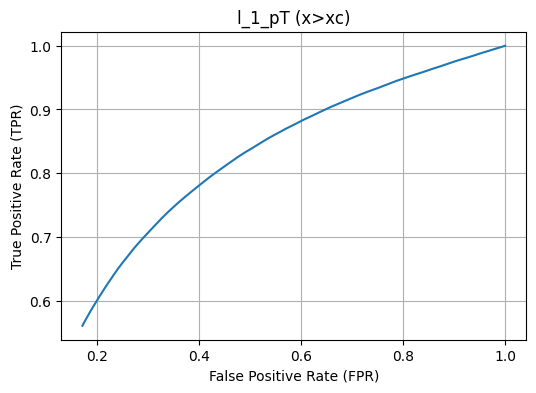

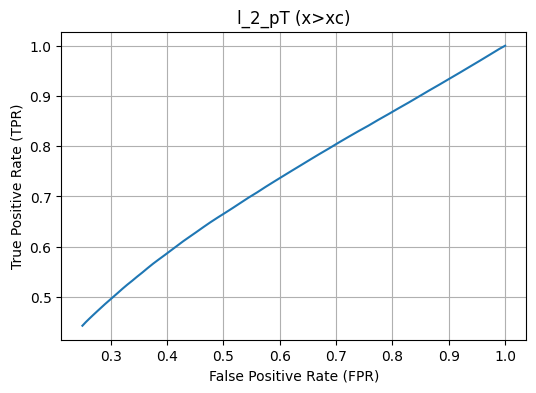

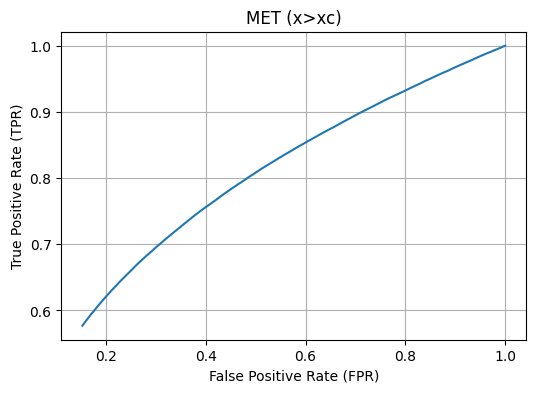

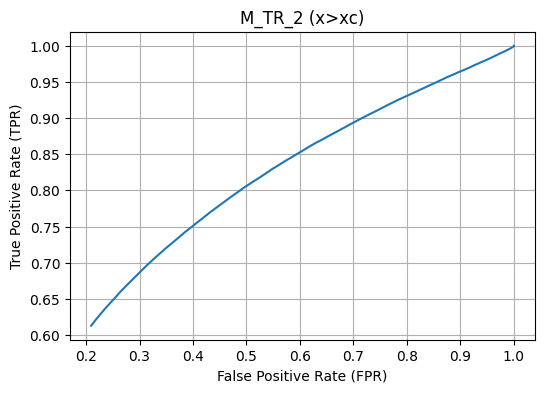

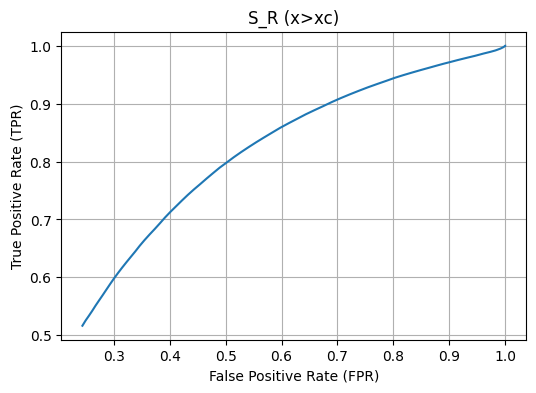

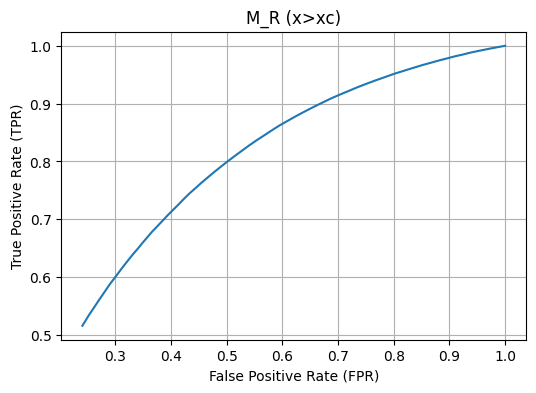

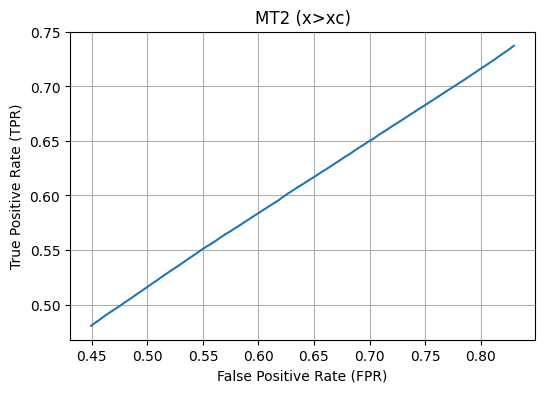

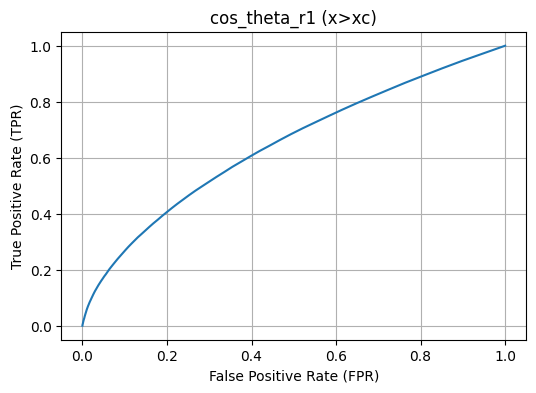

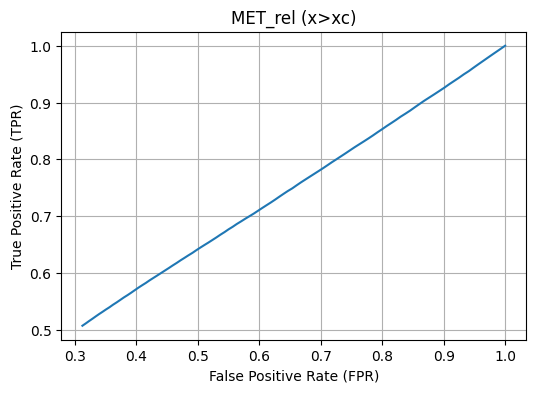

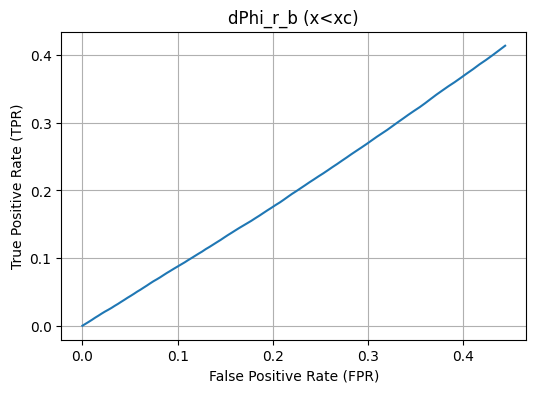

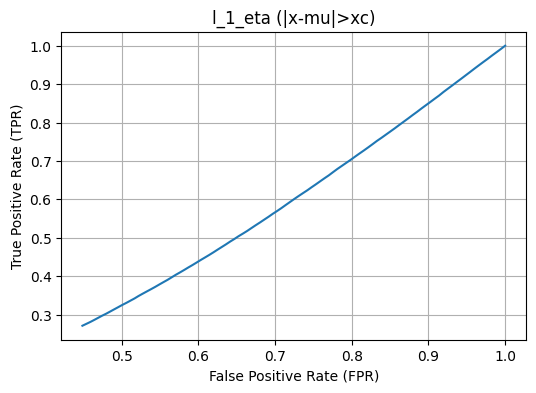

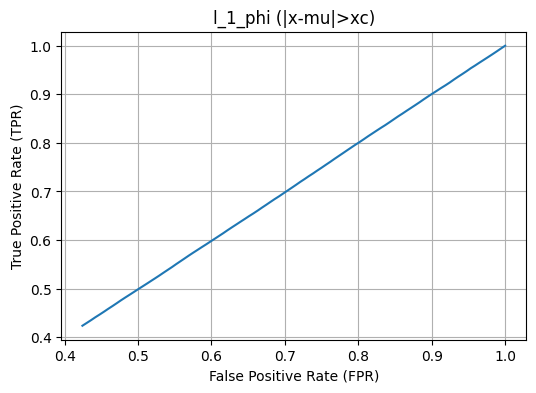

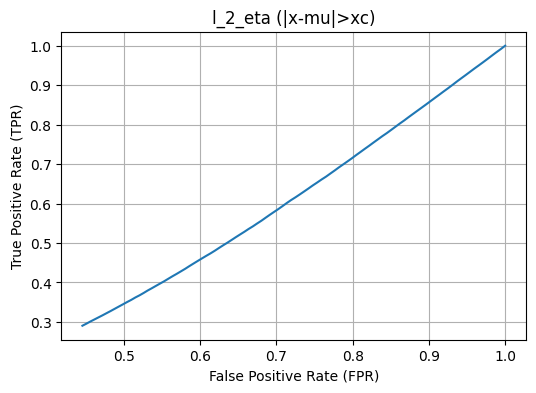

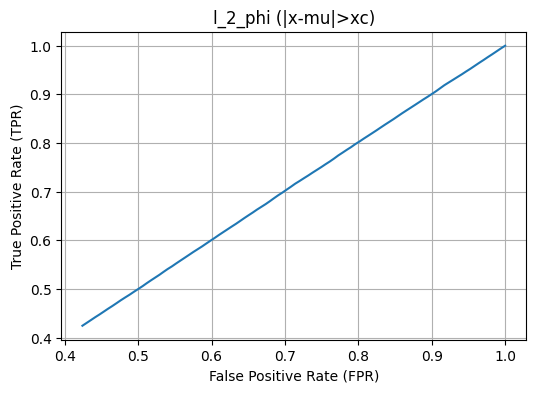

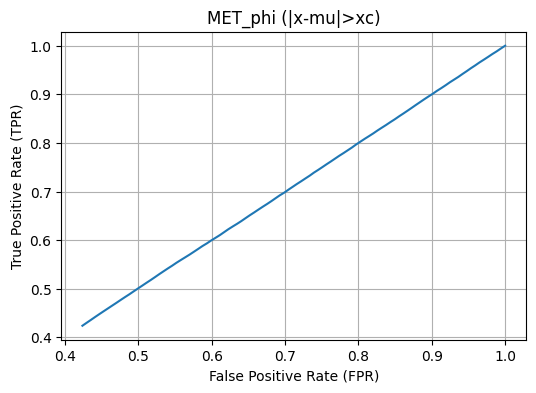

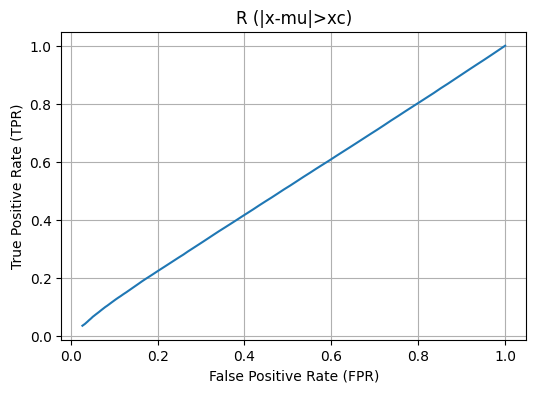

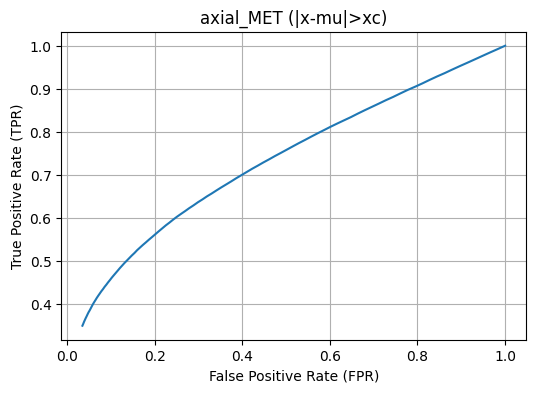

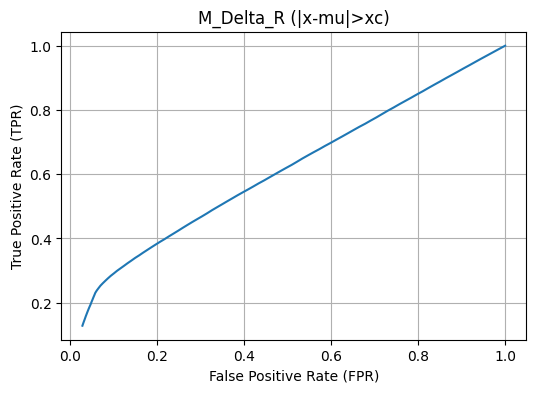

In [30]:
#5.2

import matplotlib.pyplot as plt
import numpy as np

#sets this to each of 3 conditions (since none used the fourth condition)
def calculate_rates(signal_data, background_data, thresholds, condition):
    if condition == 'x>xc':
        #sum of signal data instances being above threshold
        signal_above_threshold = np.sum(signal_data > thresholds)
        #same but with background data
        background_above_threshold = np.sum(background_data > thresholds)
   #condition 2
    elif condition == 'x<xc':
        signal_above_threshold = np.sum(signal_data < thresholds)
        background_above_threshold = np.sum(background_data < thresholds)
   #condition 3
    elif condition == '|x-mu|>xc':
        signal_above_threshold = np.sum(np.abs(signal_data - np.mean(signal_data)) > thresholds)
        background_above_threshold = np.sum(np.abs(background_data - np.mean(background_data)) > thresholds)
    else:
        raise ValueError("Invalid condition provided.")

    TPR = signal_above_threshold / len(signal_data)
    FPR = background_above_threshold / len(background_data)
    return TPR, FPR

#list of column names and their corresponding conditions
columns_conditions = {
    'l_1_pT': 'x>xc',
    'l_2_pT': 'x>xc',
    'MET': 'x>xc',
    'M_TR_2': 'x>xc',
    'S_R': 'x>xc',
    'M_R': 'x>xc',
    'MT2': 'x>xc',
    'cos_theta_r1': 'x>xc',
    'MET_rel': 'x>xc',
    'dPhi_r_b': 'x<xc',
    'l_1_eta': '|x-mu|>xc',
    'l_1_phi': '|x-mu|>xc',
    'l_2_eta': '|x-mu|>xc',
    'l_2_phi': '|x-mu|>xc',
    'MET_phi': '|x-mu|>xc',
    'R': '|x-mu|>xc',
    'axial_MET': '|x-mu|>xc',
    'M_Delta_R': '|x-mu|>xc'
}

# Loop through each column, create individual plots
for column, condition in columns_conditions.items():
    plt.figure(figsize=(6, 4))

    signal_data = df_sig[column].values
    background_data = df_bkg[column].values

    thresholds = np.linspace(0, 1, 100)
    TPR_values = []
    FPR_values = []
    for threshold in thresholds:
        TPR, FPR = calculate_rates(signal_data, background_data, threshold, condition)
        TPR_values.append(TPR)
        FPR_values.append(FPR)

    plt.plot(FPR_values, TPR_values)
    plt.title(f'{column} ({condition})')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.grid(True)
    plt.show()



In [31]:
#5.3
!pip install tabulate
import tabulate

def compare_significance(df_sig, df_bkg,
                         obs_name,
                         scenarios,bins=100,log=False):

    TPR,bins_sig = compute_rate(df_sig[obs_name],bins=bins)
    FPR,bins_sig = compute_rate(df_bkg[obs_name],bins=bins_sig)

    max_sigs=dict()
    table=list()

    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():

        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
        plt.step(bins_sig[:-1],sig,label=name+" "+str((n_sig_expected, n_bkg_expected)))

        max_i=np.argmax(sig)
        max_sigs[name]=(max_i,n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i])
        table.append((name,n_sig_expected, n_bkg_expected,
                      TPR[max_i],FPR[max_i],
                      n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i],max_i)
        )
    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()

    display(HTML(tabulate.tabulate(table, tablefmt='html',
                                   headers=["Name",'N sig','N bkg',"TPR","FPR","N sig'","N bkg'",'sig','x_c',"bin i"])))
    return max_sigs



In [32]:

def compute_rate(d,bins=100):
    hist,bins_=np.histogram(d,bins=bins,density=True)
    R = np.cumsum(hist[::-1])[::-1] * (bins_[1]-bins_[0])
    return R,bins_

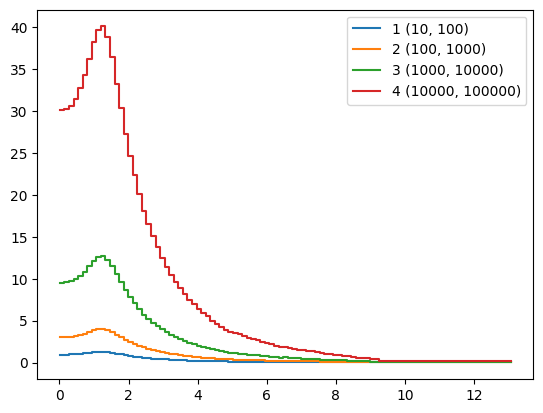

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.374939,0.0498907,3.74939,4.98907,1.26836,1.33219,10
2,100,1000,0.374939,0.0498907,37.4939,49.8907,4.01092,1.33219,10
3,1000,10000,0.374939,0.0498907,374.939,498.907,12.6836,1.33219,10
4,10000,100000,0.374939,0.0498907,3749.39,4989.07,40.1092,1.33219,10


In [33]:
scenarios = { "1": (10,100),
              "2": (100,1000),
              "3": (1000,10000),
              "4": (10000,100000)
            }
_=compare_significance(df_sig,df_bkg,"M_TR_2",scenarios)

MET


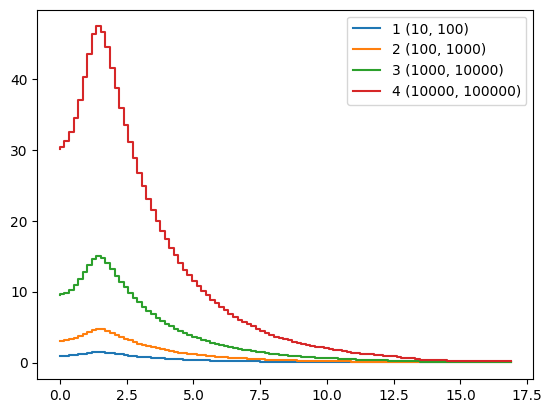

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.32676,0.0148142,3.2676,1.48142,1.49943,1.53595,9
2,100,1000,0.32676,0.0148142,32.676,14.8142,4.74162,1.53595,9
3,1000,10000,0.32676,0.0148142,326.76,148.142,14.9943,1.53595,9
4,10000,100000,0.32676,0.0148142,3267.6,1481.42,47.4162,1.53595,9


MET_phi


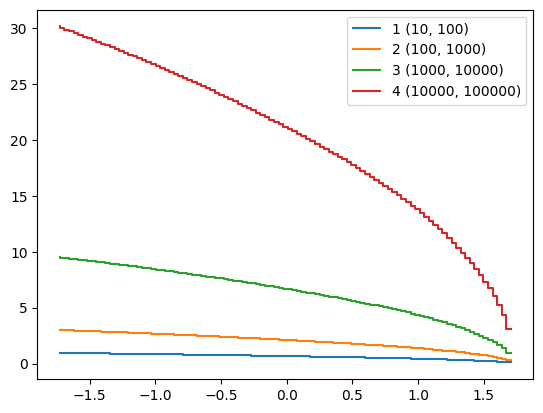

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,-1.72711,0
2,100,1000,1,1,100,1000,3.01511,-1.72711,0
3,1000,10000,1,1,1000,10000,9.53463,-1.72711,0
4,10000,100000,1,1,10000,100000,30.1511,-1.72711,0


MET_rel


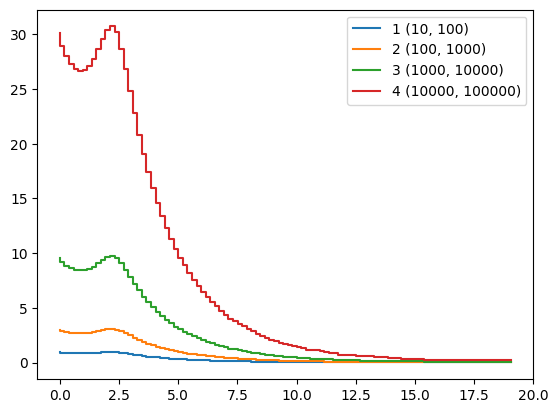

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.146559,0.00809957,1.46559,0.809957,0.971561,2.30909,12
2,100,1000,0.146559,0.00809957,14.6559,8.09957,3.07235,2.30909,12
3,1000,10000,0.146559,0.00809957,146.559,80.9957,9.71561,2.30909,12
4,10000,100000,0.146559,0.00809957,1465.59,809.957,30.7235,2.30909,12


axial_MET


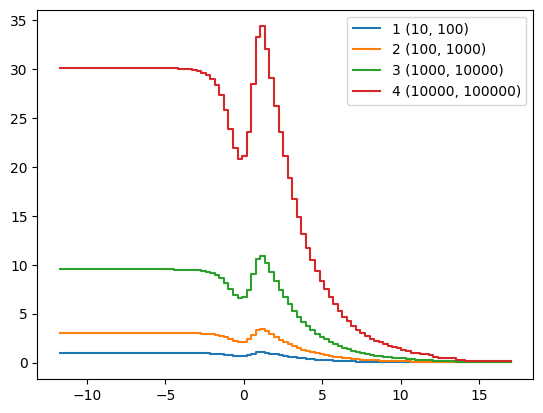

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.13647,0.00211261,1.3647,0.211261,1.08709,1.34388,45
2,100,1000,0.13647,0.00211261,13.647,2.11261,3.43767,1.34388,45
3,1000,10000,0.13647,0.00211261,136.47,21.1261,10.8709,1.34388,45
4,10000,100000,0.13647,0.00211261,1364.7,211.261,34.3767,1.34388,45


M_R


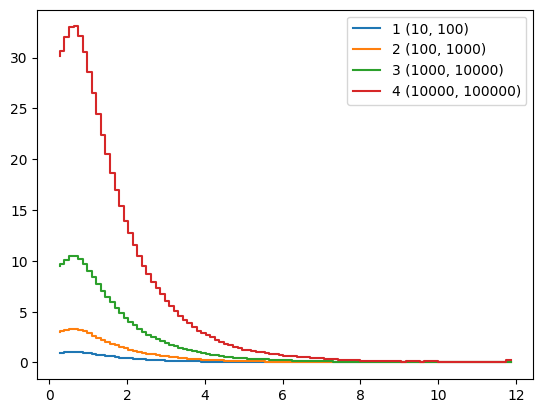

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.749936,0.439256,7.49936,43.9256,1.04577,0.741439,4
2,100,1000,0.749936,0.439256,74.9936,439.256,3.30702,0.741439,4
3,1000,10000,0.749936,0.439256,749.936,4392.56,10.4577,0.741439,4
4,10000,100000,0.749936,0.439256,7499.36,43925.6,33.0702,0.741439,4


M_TR_2


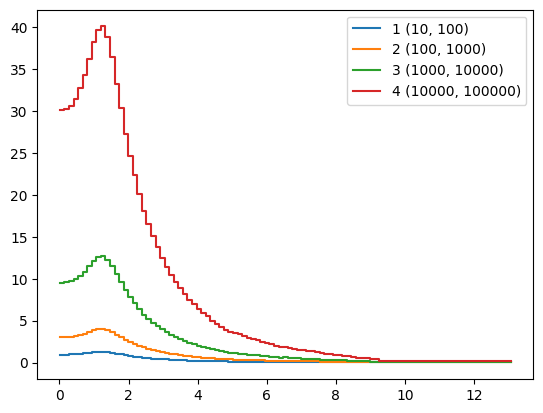

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.374939,0.0498907,3.74939,4.98907,1.26836,1.33219,10
2,100,1000,0.374939,0.0498907,37.4939,49.8907,4.01092,1.33219,10
3,1000,10000,0.374939,0.0498907,374.939,498.907,12.6836,1.33219,10
4,10000,100000,0.374939,0.0498907,3749.39,4989.07,40.1092,1.33219,10


R


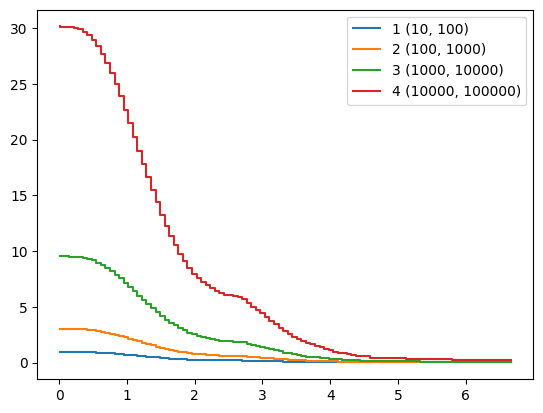

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,0.0110889,0
2,100,1000,1,1,100,1000,3.01511,0.0110889,0
3,1000,10000,1,1,1000,10000,9.53463,0.0110889,0
4,10000,100000,1,1,10000,100000,30.1511,0.0110889,0


MT2


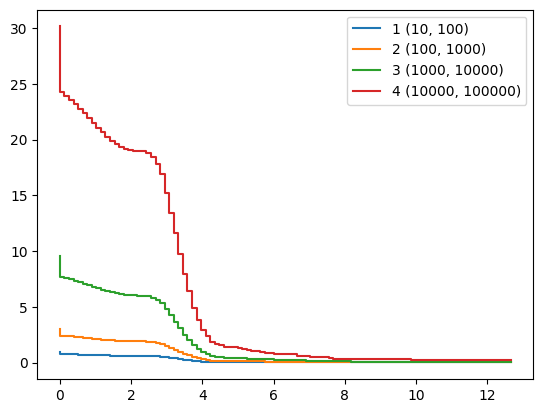

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,0,0
2,100,1000,1,1,100,1000,3.01511,0,0
3,1000,10000,1,1,1000,10000,9.53463,0,0
4,10000,100000,1,1,10000,100000,30.1511,0,0


S_R


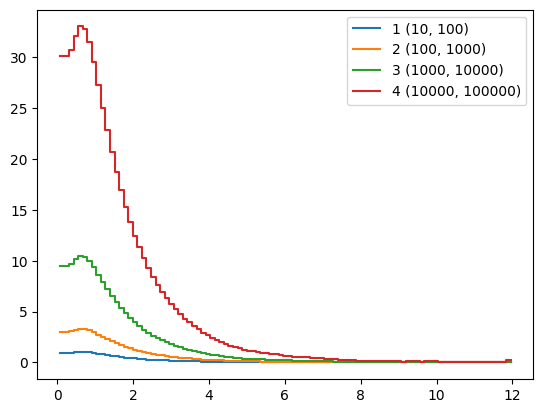

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.82438,0.54024,8.2438,54.024,1.04471,0.667132,5
2,100,1000,0.82438,0.54024,82.438,540.24,3.30366,0.667132,5
3,1000,10000,0.82438,0.54024,824.38,5402.4,10.4471,0.667132,5
4,10000,100000,0.82438,0.54024,8243.8,54024,33.0366,0.667132,5


M_Delta_R


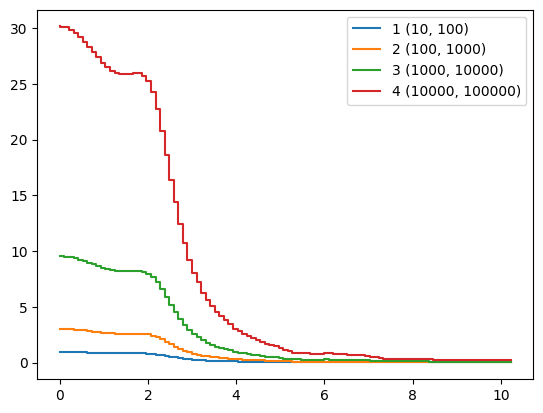

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,0.00445562,0
2,100,1000,1,1,100,1000,3.01511,0.00445562,0
3,1000,10000,1,1,1000,10000,9.53463,0.00445562,0
4,10000,100000,1,1,10000,100000,30.1511,0.00445562,0


dPhi_r_b


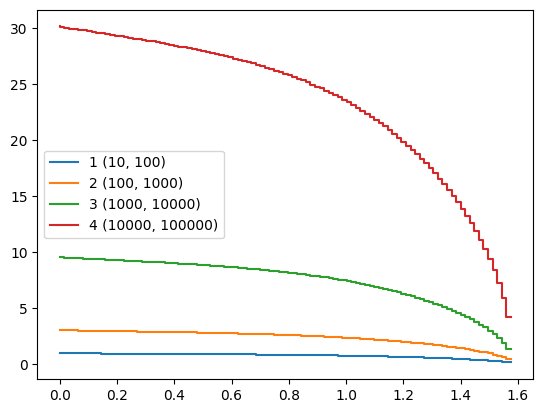

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,8.22401e-06,0
2,100,1000,1,1,100,1000,3.01511,8.22401e-06,0
3,1000,10000,1,1,1000,10000,9.53463,8.22401e-06,0
4,10000,100000,1,1,10000,100000,30.1511,8.22401e-06,0


cos_theta_r1


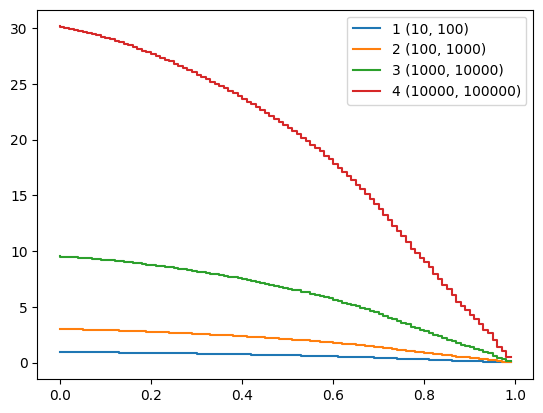

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,3.52031e-07,0
2,100,1000,1,1,100,1000,3.01511,3.52031e-07,0
3,1000,10000,1,1,1000,10000,9.53463,3.52031e-07,0
4,10000,100000,1,1,10000,100000,30.1511,3.52031e-07,0


In [34]:

my_obs= ['MET',
 'MET_phi',
 'MET_rel',
 'axial_MET',
 'M_R',
 'M_TR_2',
 'R',
 'MT2',
 'S_R',
 'M_Delta_R',
 'dPhi_r_b',
 'cos_theta_r1']

for obs in my_obs:
    print(obs)
    _=compare_significance(df_sig,df_bkg,obs,scenarios)

In [ ]:
6.1
# "M_Delta_R","M_TR_2", "MET"

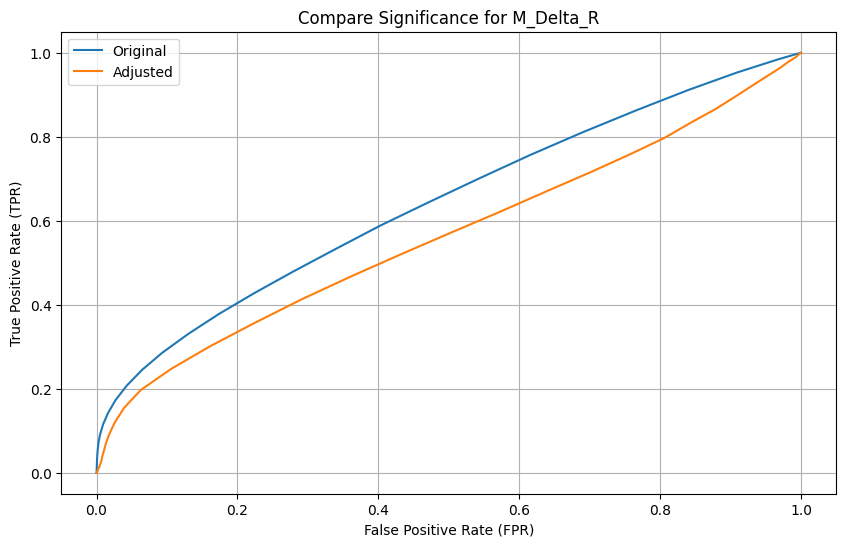

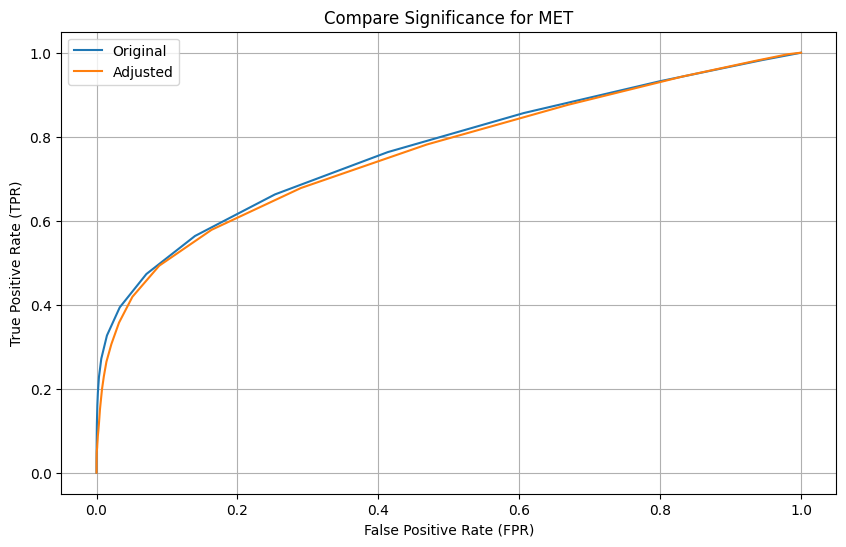

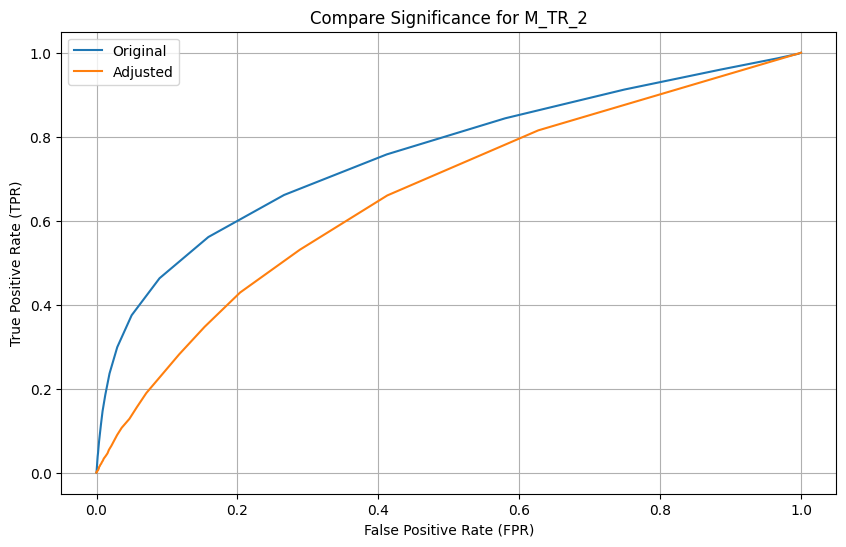

In [35]:
#6.2 added up lecture/lab codes
def compute_rate(d, bins=100):
    hist, bins_ = np.histogram(d, bins=bins, density=True)
    R = np.cumsum(hist[::-1])[::-1] * (bins_[1] - bins_[0])
    return R, bins_

def compare_significance(obs_data_sig, obs_data_bkg, obs_name, scenarios, thresholds, bins=100):
    TPR, bins_sig = compute_rate(obs_data_sig, bins=bins)
    FPR, bins_sig = compute_rate(obs_data_bkg, bins=bins_sig)
#creating a dictionary and a list
    max_sigs = dict()
    table = list()

    for x_subc, (n_sig_expected, n_bkg_expected) in zip(thresholds, scenarios):
        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime / np.sqrt(n_sig_expected_prime + n_bkg_expected_prime)

        max_i = np.argmax(sig)
        max_sigs[x_subc] = (max_i, n_sig_expected_prime[max_i], n_bkg_expected_prime[max_i], sig[max_i], bins_sig[max_i])
       #appending items to a table
        table.append((x_subc, n_sig_expected, n_bkg_expected, TPR[max_i], FPR[max_i],
                      n_sig_expected_prime[max_i], n_bkg_expected_prime[max_i], sig[max_i], bins_sig[max_i], max_i))

    return max_sigs, TPR, FPR, bins_sig, table

# Select subset of data based on condition
df_sig_1 = df_sig[df_sig["M_TR_2"] > 1.35029]
df_bkg_1 = df_bkg[df_bkg["M_TR_2"] > 1.35029]

# Define scenarios
scenarios = {
    "M_Delta_R": [(10, 100), (100, 1000), (1000, 10000), (10000, 100000)],
    "MET": [(10, 100), (100, 1000), (1000, 10000), (10000, 100000)],
    "M_TR_2": [(10, 100), (100, 1000), (1000, 10000), (10000, 100000)]
}
#threshold based off of signal value
thresholds = [-1, -1, -1]

# Calculate efficiencies
eff_s = df_sig_1.shape[0] / df_sig.shape[0]
eff_b = df_bkg_1.shape[0] / df_bkg.shape[0]

# Adjust scenarios based on efficiencies
scenarios_1 = {obs: [(eff_s * n_sig, eff_b * n_bkg) for n_sig, n_bkg in values] for obs, values in scenarios.items()}

# Compare significance for the original and adjusted scenarios
results_original = {}
results_adjusted = {}
for obs in scenarios.keys():
    results_original[obs] = compare_significance(df_sig[obs], df_bkg[obs], obs, scenarios[obs], thresholds)
    results_adjusted[obs] = compare_significance(df_sig_1[obs], df_bkg_1[obs], obs, scenarios_1[obs], thresholds)

# Plot the last two compare significance graphs
for obs in results_original.keys():
    _, TPR_orig, FPR_orig, bins_orig, _ = results_original[obs]
    _, TPR_adj, FPR_adj, bins_adj, _ = results_adjusted[obs]

    plt.figure(figsize=(10, 6))
    plt.plot(FPR_orig, TPR_orig, label='Original')
    plt.plot(FPR_adj, TPR_adj, label='Adjusted')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'Compare Significance for {obs}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
#6.3


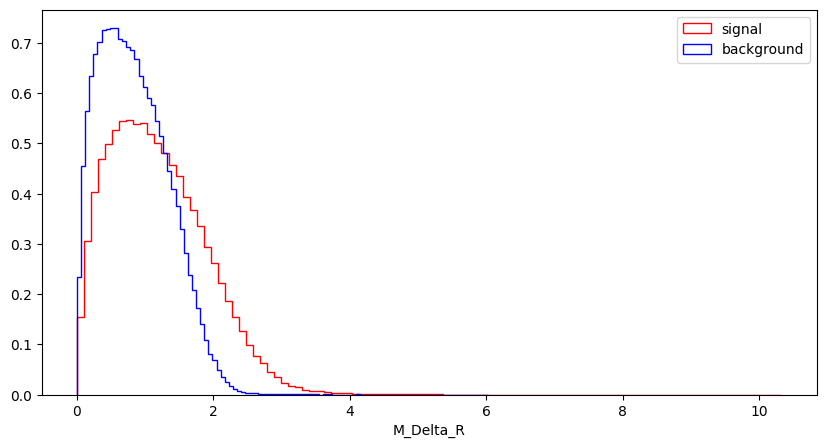

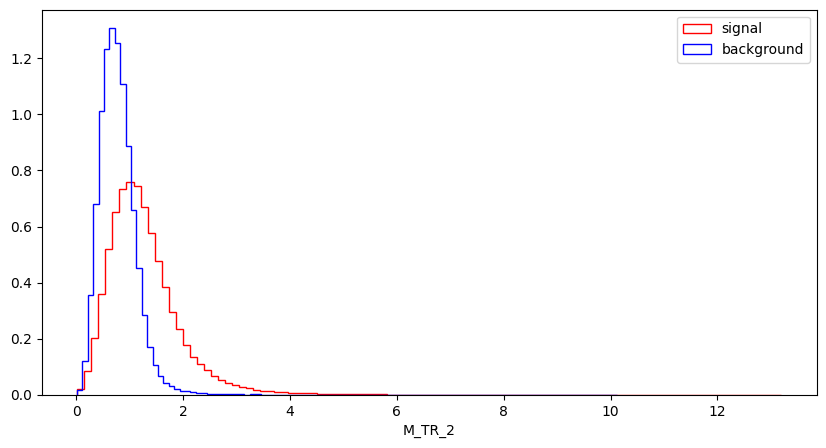

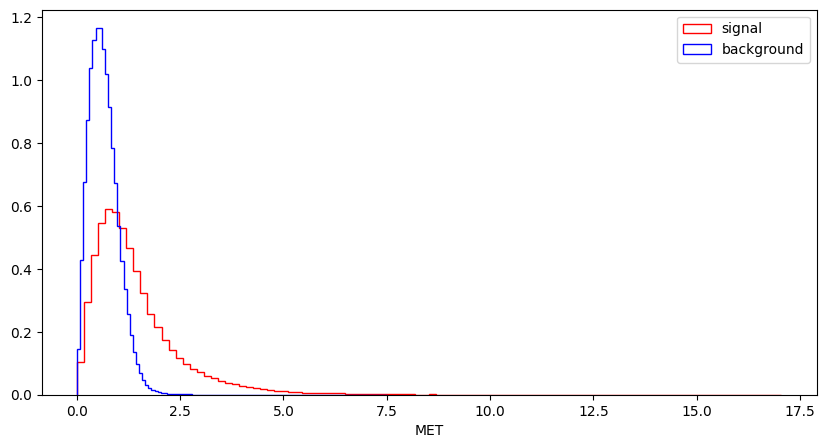

In [36]:
for var in ["M_Delta_R","M_TR_2", "MET"]:
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.xlabel(var)
    plt.show()

In [37]:

TPR_1=sum(df_sig["M_Delta_R"]>2.)/df_sig.shape[0]
FPR_1=sum(df_bkg["M_Delta_R"]>2.)/df_bkg.shape[0]


##
TPR_2=sum(df_sig["MET"]>2.)/df_sig.shape[0]
FPR_2=sum(df_bkg["MET"]>2.)/df_bkg.shape[0]

##
TPR_3=sum(df_sig["MET"]>2.)/df_sig.shape[0]
FPR_3=sum(df_bkg["MET"]>2.)/df_bkg.shape[0]


print(TPR_1)
print(FPR_1)

print(TPR_2)
print(FPR_2)

print(TPR_3)
print(FPR_3)

0.1328796702218151
0.013853853114439253
0.20014831294030405
0.0022825063249062804
0.20014831294030405
0.0022825063249062804


In [38]:
TPR_1_2=sum((TPR_1,TPR_2,TPR_3))
FPR_1_2=sum((FPR_1,FPR_2,FPR_3))

print(TPR_1_2)
print(FPR_1_2)

0.5331762961024231
0.01841886576425181


In [39]:
print(TPR_1*TPR_2*TPR_3)
print(FPR_1*FPR_2*FPR_3)

0.005323072841629493
7.217629054777433e-08


In [40]:
display(HTML(tabulate.tabulate([[ TPR_1, TPR_2, TPR_3, TPR_1*TPR_2, TPR_2*TPR_3, TPR_1*TPR_3, TPR_1_2],
                                 [FPR_1, FPR_2, FPR_3, FPR_1*FPR_2, FPR_2*FPR_3, FPR_1*FPR_3, FPR_1_2]],
                               tablefmt='html',
                               headers=['Cut 1','Cut 2', 'Cut 3', 'Cut 1 * Cut 2', 'Cut 2 * Cut 3', 'Cut 1 * Cut 3','Cut 1 & Cut 2 & Cut 3'])))

Cut 1,Cut 2,Cut 3,Cut 1 * Cut 2,Cut 2 * Cut 3,Cut 1 * Cut 3,Cut 1 & Cut 2 & Cut 3
0.13288,0.200148,0.200148,0.0265956,0.0400593,0.0265956,0.533176
0.0138539,0.00228251,0.00228251,3.16215e-05,5.20984e-06,3.16215e-05,0.0184189


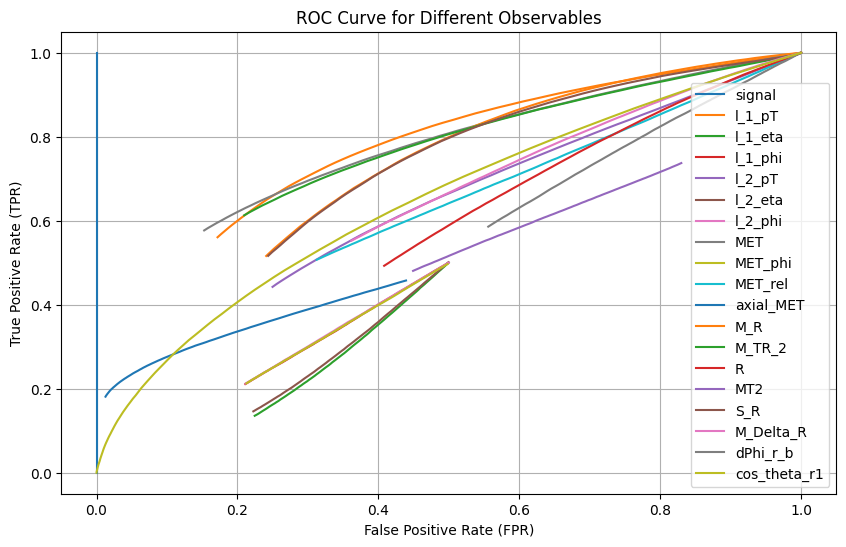

In [41]:
#####################################################ignore

import matplotlib.pyplot as plt
import numpy as np
column_names = df_sig.columns

plt.figure(figsize=(10, 6))

# Loop
for column in column_names:
    # Get signal and background data
    signal_data = df_sig[column].values
    background_data = df_bkg[column].values

    # Calculate TPR and FPR
    thresholds = np.linspace(0, 1, 100)
    TPR_values = np.sum((signal_data[:, np.newaxis] > thresholds), axis=0) / len(signal_data)
    FPR_values = np.sum((background_data[:, np.newaxis] > thresholds), axis=0) / len(background_data)

    # Plot ROC curve for each column
    plt.plot(FPR_values, TPR_values, label=column)

# Plotting settings
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Different Observables')
plt.legend()
plt.grid(True)
plt.show()


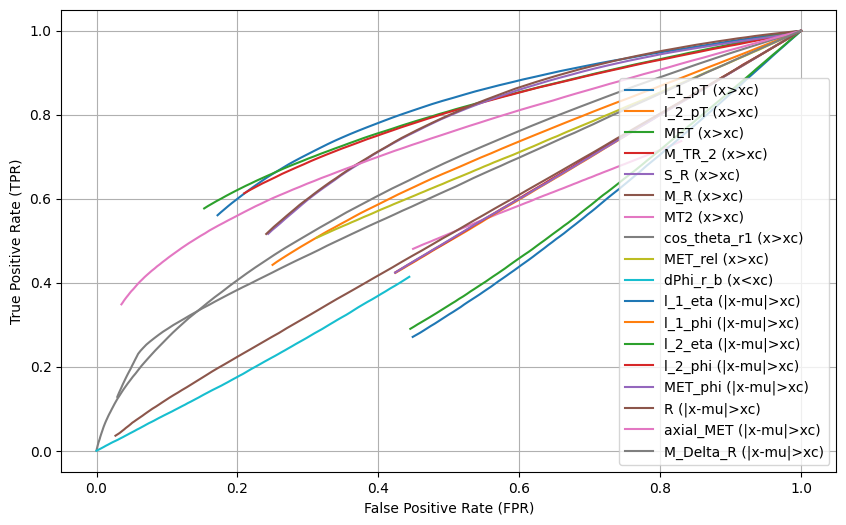

In [42]:
#ROC CURVE for all observables
import matplotlib.pyplot as plt
import numpy as np
#sets this to each of 3 conditions (since none used the fourth condition)
def calculate_rates(signal_data, background_data, thresholds, condition):
    if condition == 'x>xc':
        #sum of signal data instances being above threshold
        signal_above_threshold = np.sum(signal_data > thresholds)
        #same but with background data
        background_above_threshold = np.sum(background_data > thresholds)
    elif condition == 'x<xc':
        signal_above_threshold = np.sum(signal_data < thresholds)
        background_above_threshold = np.sum(background_data < thresholds)
    elif condition == '|x-mu|>xc':
        signal_above_threshold = np.sum(np.abs(signal_data - np.mean(signal_data)) > thresholds)
        background_above_threshold = np.sum(np.abs(background_data - np.mean(background_data)) > thresholds)
    else:
        raise ValueError("Invalid condition provided.")

    TPR = signal_above_threshold / len(signal_data)
    FPR = background_above_threshold / len(background_data)
    return TPR, FPR

#list of column names and their corresponding conditions
columns_conditions = {
    'l_1_pT': 'x>xc',
    'l_2_pT': 'x>xc',
    'MET': 'x>xc',
    'M_TR_2': 'x>xc',
    'S_R': 'x>xc',
    'M_R': 'x>xc',
    'MT2': 'x>xc',
    'cos_theta_r1': 'x>xc',
    'MET_rel': 'x>xc',
    'dPhi_r_b': 'x<xc',
    'l_1_eta': '|x-mu|>xc',
    'l_1_phi': '|x-mu|>xc',
    'l_2_eta': '|x-mu|>xc',
    'l_2_phi': '|x-mu|>xc',
    'MET_phi': '|x-mu|>xc',
    'R': '|x-mu|>xc',
    'axial_MET': '|x-mu|>xc',
    'M_Delta_R': '|x-mu|>xc'
}

plt.figure(figsize=(10, 6))

#loops through each column, condition, gets signal and backgroun data
for column, condition in columns_conditions.items():
    signal_data = df_sig[column].values
    background_data = df_bkg[column].values

    thresholds = np.linspace(0, 1, 100)
    TPR_values = []
    FPR_values = []
    for threshold in thresholds:
        TPR, FPR = calculate_rates(signal_data, background_data, threshold, condition)
        TPR_values.append(TPR)
        FPR_values.append(FPR)

    plt.plot(FPR_values, TPR_values, label=f'{column} ({condition})')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid(True)
plt.show()


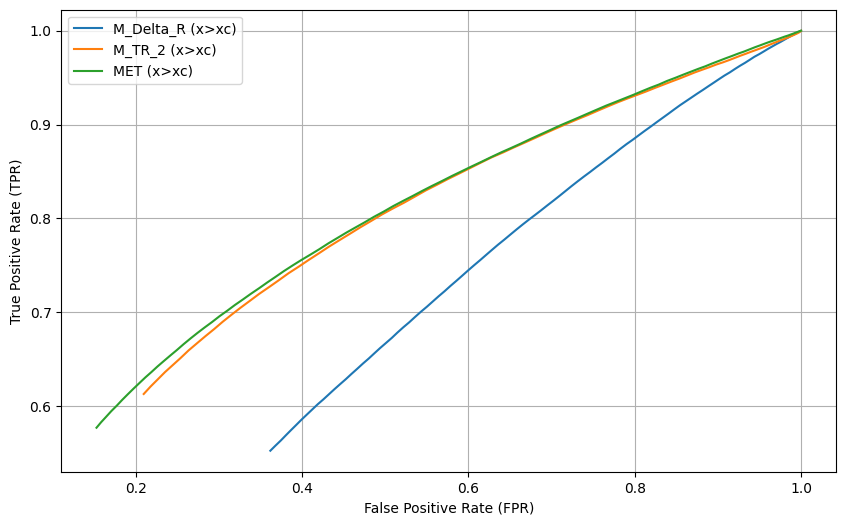

In [43]:
#7.1
import matplotlib.pyplot as plt
import numpy as np

#sets this to each of 3 conditions (since none used the fourth condition)
#borrowed from code above
def calculate_rates(signal_data, background_data, thresholds, condition):
    if condition == 'x>xc':
        signal_above_threshold = np.sum(signal_data > thresholds)
        background_above_threshold = np.sum(background_data > thresholds)
    elif condition == 'x<xc':
        signal_above_threshold = np.sum(signal_data < thresholds)
        background_above_threshold = np.sum(background_data < thresholds)
    elif condition == '|x-mu|>xc':
        signal_above_threshold = np.sum(np.abs(signal_data - np.mean(signal_data)) > thresholds)
        background_above_threshold = np.sum(np.abs(background_data - np.mean(background_data)) > thresholds)
    else:
        raise ValueError("Invalid condition provided.")

    TPR = signal_above_threshold / len(signal_data)
    FPR = background_above_threshold / len(background_data)
    return TPR, FPR

#list of obserbables names and their corresponding conditions
selected_observables = ["M_Delta_R", "M_TR_2", "MET"]
columns_conditions = {obs: 'x>xc' for obs in selected_observables}

#ROC curves for selected observables
plt.figure(figsize=(10, 6))
for column, condition in columns_conditions.items():
    signal_data = df_sig[column].values
    background_data = df_bkg[column].values

    thresholds = np.linspace(0, 1, 100)
    TPR_values = []
    FPR_values = []
    for threshold in thresholds:
        TPR, FPR = calculate_rates(signal_data, background_data, threshold, condition)
        TPR_values.append(TPR)
        FPR_values.append(FPR)

    plt.plot(FPR_values, TPR_values, label=f'{column} ({condition})')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid(True)
plt.show()


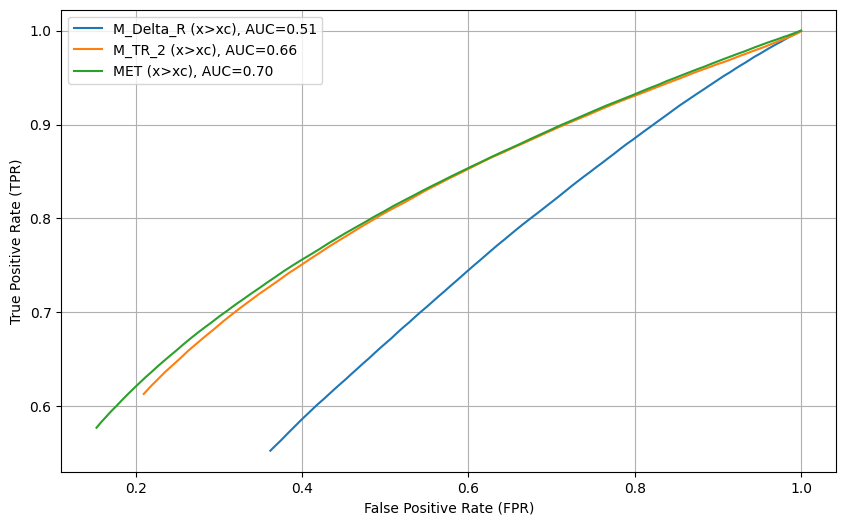

In [44]:
plt.figure(figsize=(10, 6))
for column, condition in columns_conditions.items():
    signal_data = df_sig[column].values
    background_data = df_bkg[column].values

    thresholds = np.linspace(0, 1, 100)
    TPR_values = []
    FPR_values = []
    for threshold in thresholds:
        TPR, FPR = calculate_rates(signal_data, background_data, threshold, condition)
        TPR_values.append(TPR)
        FPR_values.append(FPR)

    #AUC using the trapezoidal rule given from the lab
    AUC = 0
    for k in range(len(FPR_values) - 1):
        AUC += (FPR_values[k] - FPR_values[k + 1]) * (TPR_values[k] + TPR_values[k + 1]) / 2

    #ROC curve
    plt.plot(FPR_values, TPR_values, label=f'{column} ({condition}), AUC={AUC:.2f}')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid(True)
plt.show()


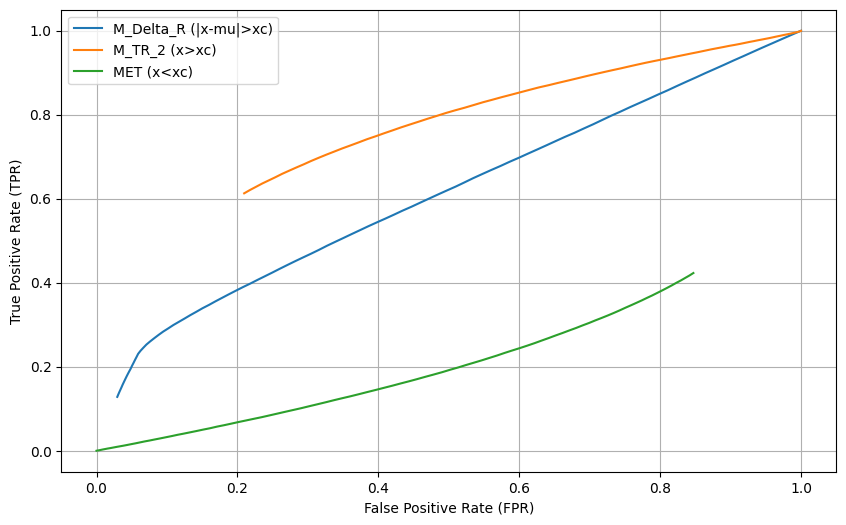

In [45]:
#7.2
import matplotlib.pyplot as plt
import numpy as np

def plot_ROC_curves(data_sig, data_bkg, columns_conditions):
    plt.figure(figsize=(10, 6))

    for column, condition in columns_conditions.items():
        signal_data = data_sig[column].values
        background_data = data_bkg[column].values

        thresholds = np.linspace(0, 1, 100)
        TPR_values = []
        FPR_values = []
        for threshold in thresholds:
            TPR, FPR = calculate_rates(signal_data, background_data, threshold, condition)
            TPR_values.append(TPR)
            FPR_values.append(FPR)

        plt.plot(FPR_values, TPR_values, label=f'{column} ({condition})')

    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend()
    plt.grid(True)
    plt.show()

columns_conditions = {
    'M_Delta_R': '|x-mu|>xc',
    'M_TR_2': 'x>xc',
    'MET': 'x<xc'
}
plot_ROC_curves(df_sig, df_bkg, columns_conditions)


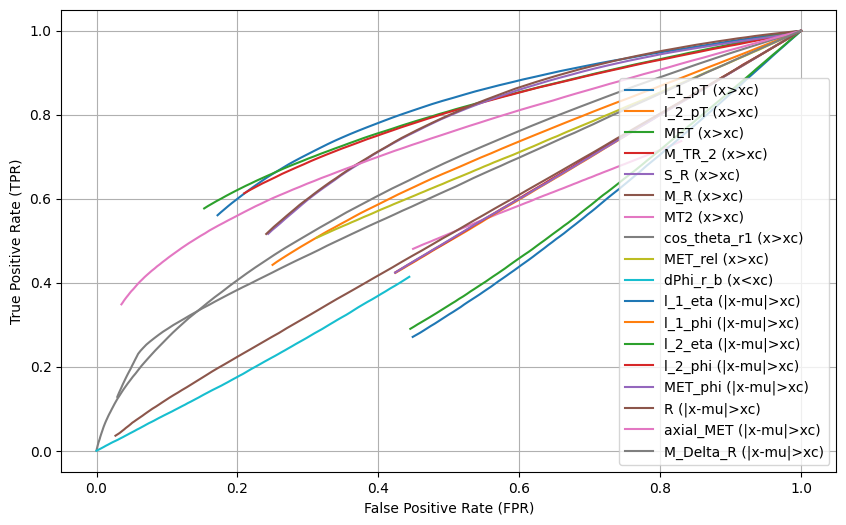

In [46]:
#7.3
#all columns
columns_conditions = {
    'l_1_pT': 'x>xc',
    'l_2_pT': 'x>xc',
    'MET': 'x>xc',
    'M_TR_2': 'x>xc',
    'S_R': 'x>xc',
    'M_R': 'x>xc',
    'MT2': 'x>xc',
    'cos_theta_r1': 'x>xc',
    'MET_rel': 'x>xc',
    'dPhi_r_b': 'x<xc',
    'l_1_eta': '|x-mu|>xc',
    'l_1_phi': '|x-mu|>xc',
    'l_2_eta': '|x-mu|>xc',
    'l_2_phi': '|x-mu|>xc',
    'MET_phi': '|x-mu|>xc',
    'R': '|x-mu|>xc',
    'axial_MET': '|x-mu|>xc',
    'M_Delta_R': '|x-mu|>xc'
}

plot_ROC_curves(df_sig, df_bkg, columns_conditions)


Scenario 1: Selection on 'M_TR_2' first, then optimization on 'M_Delta_R'


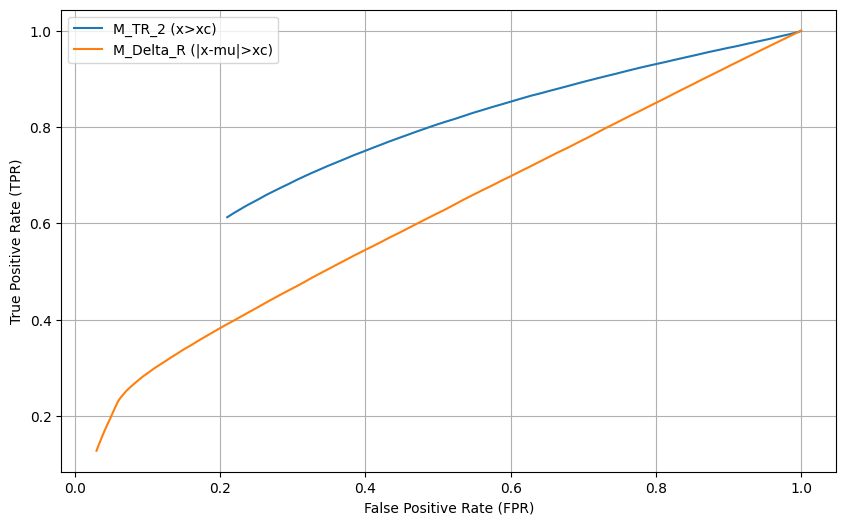

Scenario 2: Selection on 'M_Delta_R' first, then optimization on 'M_TR_2'


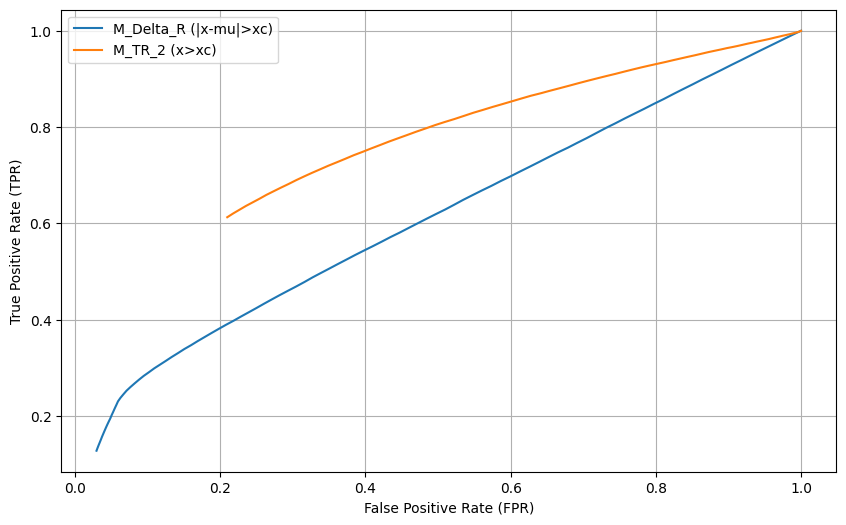

In [47]:
#7.4

scenario_1 = {
    'M_TR_2': 'x>xc',
    'M_Delta_R': '|x-mu|>xc'
}

scenario_2 = {
    'M_Delta_R': '|x-mu|>xc',
    'M_TR_2': 'x>xc'
}

print("Scenario 1: Selection on 'M_TR_2' first, then optimization on 'M_Delta_R'")
plot_ROC_curves(df_sig, df_bkg, scenario_1)

print("Scenario 2: Selection on 'M_Delta_R' first, then optimization on 'M_TR_2'")
plot_ROC_curves(df_sig, df_bkg, scenario_2)


In [48]:
#8.1
df_sig.shape

(229245, 19)

In [49]:
df_sig_0 = df_sig.drop("signal",axis=1)
df_bkg_0 = df_bkg.drop("signal",axis=1)

df_sig_0

,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
8,2.112812,0.742983,-0.330539,0.805253,-0.028887,-1.446679,2.299946,1.450429,2.989110,-1.894770,1.445125,2.548166,1.564721,2.393632,1.554566,2.148468,1.179117,0.688057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499988,0.939203,0.496058,0.492828,0.666188,-1.330323,-1.665897,1.501900,0.031668,1.689827,0.799185,1.104025,1.026356,0.824965,1.495351,1.117306,1.287094,1.173716,0.095378
499991,1.521302,0.734693,0.280339,1.590609,0.366158,-1.507171,0.828265,-0.980382,1.005345,-0.325469,1.318534,1.237360,0.832760,0.671833,1.340157,0.739515,1.115782,0.227649
499994,0.955334,-1.524135,-1.189764,1.470348,-0.296168,0.696495,0.851731,0.815524,0.259266,0.340013,1.219641,0.991118,0.721126,0.000000,1.242410,0.526798,1.313807,0.160337
499996,0.910016,-0.364544,-0.777120,0.543648,-0.910632,-1.723707,2.864673,1.458272,2.176558,-0.590911,0.673695,1.662140,2.189362,1.195041,0.910815,1.181893,1.252362,0.826035


In [ ]:
#mean of each feature over the signal
m_s= np.mean(df_sig_0,axis=0)
m_s

In [50]:
m_s= np.mean(df_sig_0,axis=0)
m_b= np.mean(df_bkg_0,axis=0)

delta = m_s-m_b
delta

l_1_pT          0.536629
l_1_eta         0.000855
l_1_phi         0.000871
l_2_pT          0.257438
l_2_eta         0.002871
l_2_phi         0.000682
MET             0.770480
MET_phi        -0.001186
MET_rel         0.505259
axial_MET       0.159264
M_R             0.339773
M_TR_2          0.496727
R               0.103093
MT2             0.137493
S_R             0.324697
M_Delta_R       0.343099
dPhi_r_b        0.028708
cos_theta_r1    0.105526
dtype: float64

In [51]:
delta=np.matrix(m_s-m_b).transpose()

In [52]:
#Calculate S_B
S_B= delta*delta.transpose()
S_B

matrix([[ 2.87970231e-01,  4.58922304e-04,  4.67467434e-04,
          1.38148662e-01,  1.54068049e-03,  3.66095560e-04,
          4.13461344e-01, -6.36618070e-04,  2.71136238e-01,
          8.54657090e-02,  1.82331687e-01,  2.66557653e-01,
          5.53227373e-02,  7.37824064e-02,  1.74241790e-01,
          1.84116478e-01,  1.54056891e-02,  5.66281031e-02],
        [ 4.58922304e-04,  7.31359210e-07,  7.44977113e-07,
          2.20159917e-04,  2.45529768e-06,  5.83426339e-07,
          6.58910580e-04, -1.01454317e-06,  4.32094896e-04,
          1.36201995e-04,  2.90571971e-04,  4.24798257e-04,
          8.81648006e-05,  1.17582959e-04,  2.77679548e-04,
          2.93416294e-04,  2.45511986e-05,  9.02450903e-05],
        [ 4.67467434e-04,  7.44977113e-07,  7.58848582e-07,
          2.24259293e-04,  2.50101531e-06,  5.94289733e-07,
          6.71179491e-04, -1.03343396e-06,  4.40140500e-04,
          1.38738075e-04,  2.95982420e-04,  4.32707998e-04,
          8.98064286e-05,  1.19772353e

In [53]:
#calculates S_W
df_sig_0-m_s

,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1,0.376895,0.063367,-1.223647,-0.632566,-0.341426,1.672494,2.057083,-1.218666,-1.262214,3.685859,-0.137674,-0.700807,-0.574424,-1.074694,-0.726613,-0.980666,0.307276,0.095167
2,-0.846238,-0.135122,-0.708447,-0.686949,-1.616358,-0.768710,-0.198463,0.504496,0.556079,-0.520699,-0.657368,-0.327344,0.531183,0.949615,-0.571526,0.376352,0.120837,-0.101507
3,-0.909822,-0.976969,0.694677,-0.689709,0.889266,-0.677378,0.614679,1.533511,1.771091,-1.094599,-0.614265,-0.253647,0.525864,0.477221,-0.413808,0.529442,0.477639,-0.191698
4,0.018919,-0.690913,-0.674735,0.450615,-0.695813,0.622858,-0.330819,-0.381271,-0.685964,1.276165,-0.004356,-0.300640,-0.327789,-1.074694,-0.091865,-1.142593,0.140236,-0.187558
8,0.821734,0.742159,-0.329015,-0.333415,-0.031374,-1.446728,0.881564,1.450900,1.713942,-1.984084,0.261474,1.279308,0.508369,1.318939,0.379543,0.962446,0.164500,0.405640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499988,-0.351875,0.495235,0.494352,-0.472480,-1.332810,-1.665947,0.083519,0.032139,0.414658,0.709871,-0.079626,-0.242503,-0.231387,0.420657,-0.057717,0.101072,0.159099,-0.187039
499991,0.230224,0.733870,0.281863,0.451941,0.363671,-1.507220,-0.590116,-0.979911,-0.269824,-0.414783,0.134882,-0.031498,-0.223592,-0.402861,0.165134,-0.446507,0.101164,-0.054768
499994,-0.335744,-1.524958,-1.188240,0.331680,-0.298655,0.696446,-0.566651,0.815994,-1.015903,0.250699,0.035990,-0.277740,-0.335226,-1.074694,0.067386,-0.659224,0.299190,-0.122080
499996,-0.381062,-0.365368,-0.775596,-0.595019,-0.913119,-1.723756,1.446292,1.458742,0.901389,-0.680225,-0.509956,0.393282,1.133010,0.120347,-0.264209,-0.004129,0.237745,0.543618


In [54]:
delta_s=np.matrix(df_sig_0-m_s).transpose()

In [55]:
S_W_s= delta_s*delta_s.transpose()

In [61]:
S_W_s.shape

(18, 18)

In [56]:
delta_b=np.matrix(df_bkg_0-m_b).transpose()
S_W_b= delta_b*delta_b.transpose()

In [57]:
# S_W
S_W=S_W_s+S_W_b
S_W.shape

(18, 18)

In [58]:
#computes w
S_W_inv = np.linalg.inv(S_W)

In [59]:
w = S_W_inv * np.matrix(m_b - m_s).transpose()

In [60]:
w

matrix([[-2.26832982e-06],
        [-5.63688439e-09],
        [-2.10423856e-09],
        [-9.95582982e-07],
        [-3.48452234e-09],
        [-2.70762588e-09],
        [-1.65185357e-06],
        [-2.74241844e-09],
        [-1.39723282e-07],
        [-2.64205675e-07],
        [ 2.72149250e-07],
        [-1.48465692e-07],
        [ 2.11167032e-06],
        [ 3.24040633e-07],
        [ 1.81173242e-06],
        [-1.69348122e-06],
        [ 7.50902836e-08],
        [-5.06860437e-06]])

In [62]:
w_1 = w / sum(w)
w_1

matrix([[ 2.96426929e-01],
        [ 7.36631998e-04],
        [ 2.74983369e-04],
        [ 1.30103481e-01],
        [ 4.55359819e-04],
        [ 3.53834445e-04],
        [ 2.15865381e-01],
        [ 3.58381161e-04],
        [ 1.82591363e-02],
        [ 3.45265825e-02],
        [-3.55646545e-02],
        [ 1.94016005e-02],
        [-2.75954556e-01],
        [-4.23458567e-02],
        [-2.36758461e-01],
        [ 2.21305311e-01],
        [-9.81285083e-03],
        [ 6.62368767e-01]])

In [63]:
output_s=np.matrix(df_sig_0)*w_1
output_b=np.matrix(df_bkg_0)*w_1

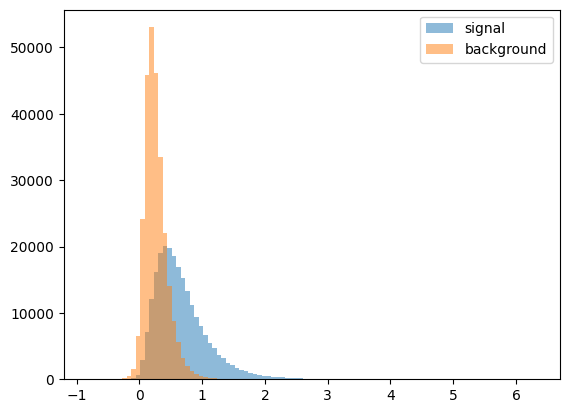

In [64]:
h_s,bins,_=plt.hist(output_s,label="signal",alpha=0.5,bins=100)
h_b,bins,_=plt.hist(output_b,bins=bins,alpha=0.5,label="background")
plt.legend()

In [65]:
w.shape

(18, 1)

In [67]:
h_b.shape

(100,)

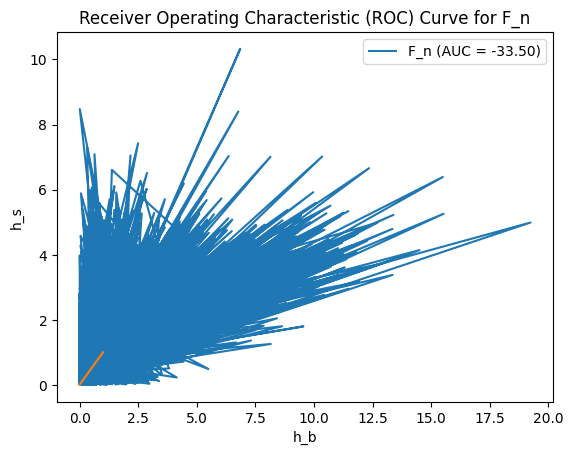

In [80]:
# ROC curve for F_n
from sklearn.metrics import roc_auc_score
plt.plot(h_b,h_s, label=f'F_n (AUC = {AUC(h_s, h_b):.2f})')
plt.title("Receiver Operating Characteristic (ROC) Curve for F_n")
plt.xlabel("h_b")
plt.ylabel("h_s")
plt.legend()
plt.plot([0,1],[0,1])

In [ ]:
#max sig  is 10-11